In [85]:
from jarvis.db.figshare import data
import pandas as pd
from jarvis.analysis.elastic.tensor import ElasticTensor
from jarvis.core.atoms import Atoms
from jarvis.io.vasp.inputs import get_nelect
dft_3d=data('dft_3d')
eph=data('edos_pdos')
dft_3d_df=pd.DataFrame(dft_3d)
eph_df=pd.DataFrame(eph)
eph_dft=pd.merge(dft_3d_df,eph_df,on='jid')

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
Interpolated electronic total dos spin-up dataset 55k...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


In [86]:
x=[]
for i,ii in eph_dft.iterrows():
    if ii['elastic_tensor']!='na':
        try:
            atoms=Atoms.from_dict(ii['atoms_x'])
            et=ElasticTensor(ii['elastic_tensor']).debye_temperature(atoms)
            if et !=np.nan:
                ii['theta']=et
                nelect=get_nelect(atoms)
                dos=np.array(ii['edos_up'])*nelect*2
                ii['DOS']=dos[100]
                x.append(ii)
        except:
            pass
df_3d_theta=pd.DataFrame(x)

/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis/analysis/elastic/tensor.py:67: RuntimeWarning: invalid value encountered in sqrt
  vel = np.sqrt(1e9 * g_vrh / mass_density)
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis/analysis/elastic/tensor.py:57: RuntimeWarning: invalid value encountered in sqrt
  vel = np.sqrt(1e9 * (k_vrh + 4.0 / 3.0 * g_vrh) / mass_density)


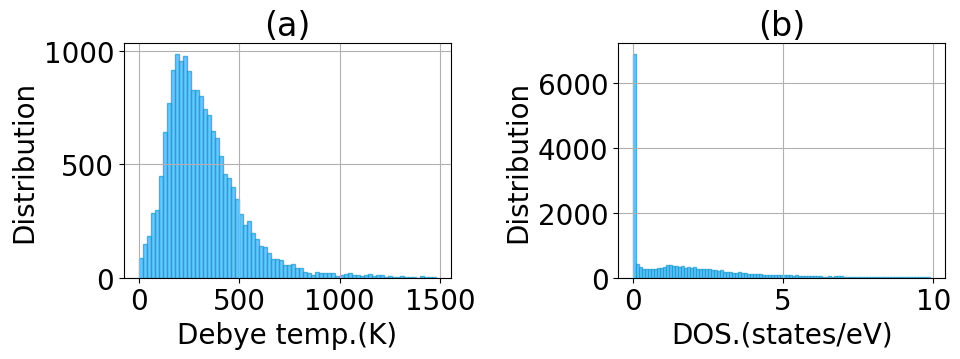

In [87]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from jarvis.io.vasp.inputs import get_nelect
plt.close()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('default')
the_grid=GridSpec(1,2)
plt.rcParams.update({'font.size':20})
#plt.rcParams["font.family"] = "Times"
#plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(10,4))
plt.subplot(the_grid[0])
plt.title('(a)')
plt.grid(True)
val=np.array(df_3d_theta['theta'].values)
plt.hist(val,bins=np.arange(0,1500,20),facecolor = '#2ab0ff', edgecolor='#169acf',alpha=0.7)
plt.xlabel('Debye temp.(K)')
plt.ylabel('Distribution')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)



plt.subplot(the_grid[1])
plt.title('(b)')
plt.grid(True)
val=np.array(df_3d_theta['DOS'].values)
#plt.hist(val,bins=np.arange(0,1500,20),facecolor = '#2ab0ff', edgecolor='#169acf',alpha=0.7)
plt.hist(val,bins=np.arange(0,10,.1),facecolor = '#2ab0ff', edgecolor='#169acf',alpha=0.7)
plt.xlabel('DOS.(states/eV)')
plt.ylabel('Distribution')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.tight_layout()

In [89]:
from jarvis.core.composition import Composition
import math
#def ptable_map(i_data=[],tol=300,filename='debyedata'):
def ptable_map(i_data=[],tol=1,filename='dosdatax'):
    data_true={}
    data_false={}
    for i in i_data:
        val=i['val']
        if val>=tol:
            comp=i['comp']
           
            for k,v in comp.items():
                #print (k.symbol)
                #break
                #if k.symbol=='Ru':
                #    print ('comp,val',comp,val)
                data_true.setdefault(k, []).append(1.0)
        elif val<tol:
            comp=i['comp']
            for k,v in comp.items():
                data_false.setdefault(k, []).append(1.0)   
        else:
            print ('Big problem, check data',i)
    data2_true={}
    for k1,v1 in data_true.items():
        for k2,v2 in data_false.items():
            if k1==k2:
                #print (k1,k2,np.sum(v1),np.sum(v2))
                prob=100*(float(np.sum(v1))/float(np.sum(v1)+np.sum(v2)))
                data2_true.setdefault(k1, []).append(prob)

    f=open(filename,'w')
    for k,v in data2_true.items():
        line=str(k)+str(' ')+str(v[0])+str('\n')
        f.write(line)
    f.close()
    
    
i_data=[]
for ii,i in df_3d_theta.iterrows():
    info={}
    
    tc=i['DOS']#i['Theta']#i['Tc']
    #mag=(i['Mag'])
    #print ('mag',mag)
#     if tc!='na' and mag!='na' and float(mag)<0.5:
#         #a=Atoms.from_dict(i['atoms'])
#         comp=Composition.from_string(i['Formula']).to_dict()
#         info['comp']=comp#a.composition.to_dict()
#         info['val']=float(tc)
#         i_data.append(info)
#     #break
    #if tc<5000 and i['DOS']>0.5:
    if tc<10:#00 and i['DOS']>0.5:
       try: 
        #a=Atoms.from_dict(i['atoms'])
        comp=Composition.from_string(i['formula']).to_dict()
        info['comp']=comp#a.composition.to_dict()
        info['val']=float(tc)
        i_data.append(info)
       except:
        pass
ptable_map(i_data=i_data)

In [94]:
from jarvis.analysis.periodic.ptable import plot_ptable_trend

plot_ptable_trend(input_file='dosdatax',save_plot=False)

/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis/analysis/periodic/ptable.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements.period[i] = "La"
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis/analysis/periodic/ptable.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements.group[i] = str(count + 4)
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis/analysis/periodic/ptable.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Figure(id='1384', ...)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


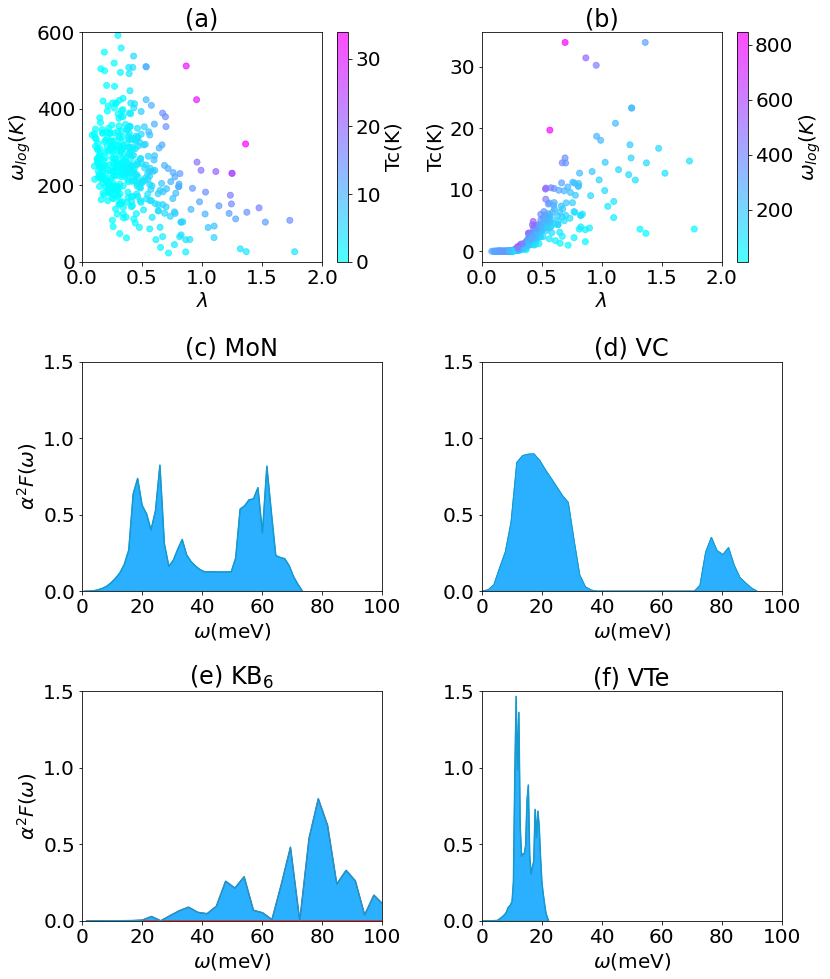

In [96]:
from jarvis.db.jsonutils import loadjson
d620=loadjson('../HT_DATA/620/jarvis_epc_data600a.json')
lam=[]
wl=[]
tc=[]
for i in d620:
    if i['stability']=='stable' and i['Tc']<500:
        lam.append(i['lamb'])
        wl.append(i['wlog'])
        tc.append(i['Tc'])
lam=[]
wl=[]
tc=[]
for i in d620:
    if i['stability']=='stable' and i['Tc']<500:
        lam.append(i['lamb'])
        wl.append(i['wlog'])
        tc.append(i['Tc'])
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt
%matplotlib inline
RY_TO_EV=13.6056980659
def get_a2f(fname='a2F.dos10_JVASP-961'):
    f=open(fname,'r')
    lines=f.read().splitlines()
    f.close()
    x=[]
    y=[]
    for i in lines:
        tmp=i.split()
        if len(tmp)>2 and '#' not in i and 'lambda' not in i:
            tmp=i.split()
            #print(tmp)
            x.append(1000*RY_TO_EV*float(tmp[0]))
            y.append(float(tmp[1]))
    return x,y

the_grid=GridSpec(3,2)#,wspace=0.1,hspace=0.7)
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)


plt.rcParams.update({'font.size':20})
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(12,14))



plt.subplot(the_grid[0,0])
plt.title('(a)')
plt.scatter(lam,wl,c=tc,alpha=.7,cmap='cool')
plt.xlabel('$\lambda$')
plt.ylabel('$\omega_{log}(K)$')
plt.xlim([0,2])
plt.ylim([0,600])
cbar = plt.colorbar()
cbar.set_label('Tc(K)')
plt.tight_layout()


plt.subplot(the_grid[0,1])
plt.scatter(lam,tc,c=wl,alpha=.7,cmap='cool')
plt.xlim([0,2])
plt.title('(b)')
plt.xlabel('$\lambda$')
plt.ylabel('Tc(K)')
cbar = plt.colorbar()
cbar.set_label('$\omega_{log}(K)$')
plt.tight_layout()


plt.subplot(the_grid[1,0])
plt.ylabel(r'$\alpha^2 F (\omega)$')
x,y=get_a2f('a2F.dos10_JVASP-16897')
plt.plot(x,y,c='#169acf')
plt.xlabel('$\omega$(meV)')
plt.fill(x,y,c='#169acf',facecolor='#2ab0ff')
plt.ylim([0,1.5])
plt.xlim([0,100])
plt.title('(c) MoN')
#plt.xticks(rotation = 45)
#plt.yticks([])



plt.subplot(the_grid[1,1])
x,y=get_a2f('a2F.dos10_JVASP-19657')
#plt.ylabel(r'$\alpha^2 F (\omega)$')
plt.fill(x,y,c='#169acf',facecolor='#2ab0ff')
plt.xlabel('$\omega$(meV)')
#plt.ylabel(r'$\alpha^2 F (\omega)$')
plt.fill(x,y,c='#169acf',facecolor='#2ab0ff')
plt.ylim([0,1.5])
plt.xlim([0,100])
plt.title('(d) VC')
#plt.yticks([])



plt.subplot(the_grid[2,0])
x,y=get_a2f('a2F.dos10_JVASP-20067')
plt.title('(e) KB$_6$')
plt.plot(x,y,c='#169acf')
plt.xlabel('$\omega$(meV)')
plt.ylabel(r'$\alpha^2 F (\omega)$')
plt.fill(x,y,c='red',facecolor='#2ab0ff')
plt.ylim([0,1.5])
plt.xlim([0,100])
#plt.yticks([])









plt.subplot(the_grid[2,1])
#plt.ylabel(r'$\alpha^2 F (\omega)$')
plt.title('(f) VTe')
#x,y=get_a2f('a2F.dos10_JVASP-19896')
x,y=get_a2f('a2F.dos10_JVASP-122995')

plt.plot(x,y,c='#169acf')
plt.xlabel('$\omega$(meV)')
#plt.ylabel(r'$\alpha^2 F (\omega)$')
plt.fill(x,y,c='#169acf',facecolor='#2ab0ff')
plt.ylim([0,1.5])
plt.xlim([0,100])
#plt.yticks([])







plt.tight_layout()
# plt.savefig('a2F.pdf')
# plt.close()

In [21]:
from jarvis.db.figshare import get_jid_data,data
import numpy as np
from jarvis.analysis.elastic.tensor import ElasticTensor
from jarvis.db.webpages import Webpage
from jarvis.core.atoms import Atoms
from jarvis.io.vasp.inputs import get_nelect
from jarvis.core.specie import Specie
import math
dat=data('dft_3d')
edp=data('edos_pdos')

def get_deb(dat=[],atoms=[]):
     if dat["elastic_tensor"]!='na':
       et= ElasticTensor(dat["elastic_tensor"])
       dd = et.debye_temperature(atoms=atoms)
       return dd

def get_efermi_dos(jid='',nelect=''):
    #w=Webpage(jid)
    #edos=w.get_dft_electron_dos()
    #edos_en=np.array(edos['edos_energies'].strip("'").split(","),dtype='float')
    #edos_up=np.array(edos['total_edos_up'].strip("'").split(","),dtype='float')
    for i in edp:
      if i['jid']==jid:
          return 2*i['edos_up'][100]*nelect
        
mem=[]
for i in dat:
       atoms=Atoms.from_dict(i['atoms'])
       mag=i['magmom_oszicar']
       spil=i['spillage']
       elements=atoms.elements
       #masses=[Specie(s).atomic_mass for s in elements]
       v=atoms.composition.weight
       num_atoms=atoms.num_atoms
       nelect=get_nelect(atoms)#/atoms.num_atoms
       dos=get_efermi_dos(jid=i['jid'],nelect=nelect)
       info={}
       info['jid']=i['jid']
       info['atoms']=i['atoms']
       info['dos']=dos
       info['mag']=mag
       info['e_form']=i['formation_energy_peratom']
       mem.append(info)


Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
Interpolated electronic total dos spin-up dataset 55k...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


In [22]:
b=[]
c=[]
n=[]
for i in mem:
    if 'B' in i['atoms']['elements'] and i['dos'] is not None and i['dos']>=1 and i['mag']!='na' and abs(i['mag'])<0.1 and i['e_form']<0:
        b.append(i)
    if 'C' in i['atoms']['elements'] and i['dos'] is not None and i['dos']>=1 and i['mag']!='na' and abs(i['mag'])<0.1 and i['e_form']<0:
        c.append(i)   
    if 'N' in i['atoms']['elements'] and i['dos'] is not None and i['dos']>=1 and i['mag']!='na' and abs(i['mag'])<0.1 and i['e_form']<0:
        n.append(i)

In [23]:
len(b),len(c),len(n)

(632, 560, 431)

In [98]:
import pandas as pd
df01=pd.read_json('/mnt/c/Users/knc6/OneDrive - NIST/KamalLaptop/JARVIS-SuperCond/NPJ/Mu_scan/jarvis_epc_data1100_01.json')
df03=pd.read_json('/mnt/c/Users/knc6/OneDrive - NIST/KamalLaptop/JARVIS-SuperCond/NPJ/Mu_scan/jarvis_epc_data1100_03.json')
df06=pd.read_json('/mnt/c/Users/knc6/OneDrive - NIST/KamalLaptop/JARVIS-SuperCond/NPJ/Mu_scan/jarvis_epc_data1100_06.json')
df085=pd.read_json('/mnt/c/Users/knc6/OneDrive - NIST/KamalLaptop/JARVIS-SuperCond/NPJ/Mu_scan/jarvis_epc_data1100_085.json')

df09=pd.read_json('/mnt/c/Users/knc6/OneDrive - NIST/KamalLaptop/JARVIS-SuperCond/NPJ/Mu_scan/jarvis_epc_data1100_09.json')
df12=pd.read_json('/mnt/c/Users/knc6/OneDrive - NIST/KamalLaptop/JARVIS-SuperCond/NPJ/Mu_scan/jarvis_epc_data1100_12.json')
df15=pd.read_json('/mnt/c/Users/knc6/OneDrive - NIST/KamalLaptop/JARVIS-SuperCond/NPJ/Mu_scan/jarvis_epc_data1100_15.json')
df18=pd.read_json('/mnt/c/Users/knc6/OneDrive - NIST/KamalLaptop/JARVIS-SuperCond/NPJ/Mu_scan/jarvis_epc_data1100_18.json')
df2=pd.read_json('/mnt/c/Users/knc6/OneDrive - NIST/KamalLaptop/JARVIS-SuperCond/NPJ/Mu_scan/jarvis_epc_data1100_2.json')

[134.09669211 116.79389313 100.          95.92875318  96.18320611
  97.20101781]


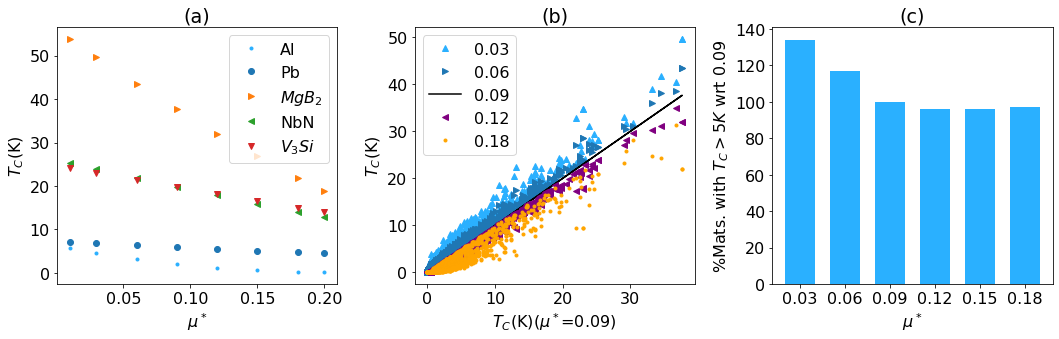

In [101]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
the_grid=GridSpec(1,3)
plt.rcParams.update({'font.size':16})
#plt.rcParams["font.family"] = "Times"
plt.figure(figsize=(15,5))

plt.subplot(the_grid[0,0])
plt.title('(a)')

mus=[0.01,0.03,0.06,0.09,0.12,0.15,0.18,.2]
jid='JVASP-1151'
vals_mgb2=np.array([df01[df01['jid']==jid].Tc.values[0],df03[df03['jid']==jid].Tc.values[0],df06[df06['jid']==jid].Tc.values[0],df09[df09['jid']==jid].Tc.values[0],df12[df12['jid']==jid].Tc.values[0],df15[df15['jid']==jid].Tc.values[0],df18[df18['jid']==jid].Tc.values[0],df2[df2['jid']==jid].Tc.values[0]])
jid='JVASP-961' #961
vals_pb=np.array([df01[df01['jid']==jid].Tc.values[0],df03[df03['jid']==jid].Tc.values[0],df06[df06['jid']==jid].Tc.values[0],df09[df09['jid']==jid].Tc.values[0],df12[df12['jid']==jid].Tc.values[0],df15[df15['jid']==jid].Tc.values[0],df18[df18['jid']==jid].Tc.values[0],df2[df2['jid']==jid].Tc.values[0]])

jid='JVASP-816' #961
vals_al=np.array([df01[df01['jid']==jid].Tc.values[0],df03[df03['jid']==jid].Tc.values[0],df06[df06['jid']==jid].Tc.values[0],df09[df09['jid']==jid].Tc.values[0],df12[df12['jid']==jid].Tc.values[0],df15[df15['jid']==jid].Tc.values[0],df18[df18['jid']==jid].Tc.values[0],df2[df2['jid']==jid].Tc.values[0]])

jid='JVASP-14960' #961
vals_v3si=np.array([df01[df01['jid']==jid].Tc.values[0],df03[df03['jid']==jid].Tc.values[0],df06[df06['jid']==jid].Tc.values[0],df09[df09['jid']==jid].Tc.values[0],df12[df12['jid']==jid].Tc.values[0],df15[df15['jid']==jid].Tc.values[0],df18[df18['jid']==jid].Tc.values[0],df2[df2['jid']==jid].Tc.values[0]])


jid='JVASP-36335'
vals_nbn=np.array([df01[df01['jid']==jid].Tc.values[0],df03[df03['jid']==jid].Tc.values[0],df06[df06['jid']==jid].Tc.values[0],df09[df09['jid']==jid].Tc.values[0],df12[df12['jid']==jid].Tc.values[0],df15[df15['jid']==jid].Tc.values[0],df18[df18['jid']==jid].Tc.values[0],df2[df2['jid']==jid].Tc.values[0]])
plt.plot(mus,vals_al,'.',label='Al',color='#2ab0ff')
plt.plot(mus,vals_pb,'o',label='Pb')
plt.plot(mus,vals_mgb2,'>',label='$MgB_2$')
plt.plot(mus,vals_nbn,'<',label='NbN')
plt.plot(mus,vals_v3si,'v',label='$V_3Si$')
plt.xlabel('$\mu^*$')
plt.ylabel('$T_C$(K)')
plt.legend()

plt.subplot(the_grid[0,1])
plt.title('(b)')
import numpy as np

# pdm = pd.merge(df09,df01,on='jid')
# pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
# pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
# plt.plot(pdm['Tc_x'],pdm['Tc_y'],'.',label='0.01')

pdm = pd.merge(df09,df03,on='jid')
pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
plt.plot(pdm['Tc_x'],pdm['Tc_y'],'^',label='0.03',color='#2ab0ff')


pdm = pd.merge(df09,df06,on='jid')
pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
plt.plot(pdm['Tc_x'],pdm['Tc_y'],'>',label='0.06')

pdm = pd.merge(df09,df09,on='jid')
pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
plt.plot(pdm['Tc_x'],pdm['Tc_y'],label='0.09',color='black')

pdm = pd.merge(df09,df12,on='jid')
pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
plt.plot(pdm['Tc_x'],pdm['Tc_y'],'<',label='0.12',color='purple')

# pdm = pd.merge(df09,df15,on='jid')
# pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
# pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
# plt.plot(pdm['Tc_x'],pdm['Tc_y'],'.',label='0.15')

pdm = pd.merge(df09,df18,on='jid')
pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
plt.plot(pdm['Tc_x'],pdm['Tc_y'],'.',label='0.18',color='orange')


# pdm = pd.merge(df09,df2,on='jid')
# pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
# pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
# plt.plot(pdm['Tc_x'],pdm['Tc_y'],'v',label='0.2')

plt.legend()
plt.xlabel('$T_C$(K)($\mu^*$=0.09)')
plt.ylabel('$T_C$(K)')



plt.subplot(the_grid[0,2])
plt.title('(c)')
thresh=5
tc5 = [df03[df03['Tc']>=thresh].shape[0], df06[df06['Tc']>=thresh].shape[0], df09[df09['Tc']>=thresh].shape[0], df12[df12['Tc']>=thresh].shape[0], df15[df15['Tc']>=thresh].shape[0], df18[df18['Tc']>=thresh].shape[0]]
tc5=np.array(tc5)/tc5[2]*100
#tc5
print (tc5)
plt.bar([.03,.06,.09,.12,0.15,.18],tc5,width=.02,color='#2ab0ff')
plt.xticks([.03,.06,.09,.12,0.15,.18],[.03,.06,.09,.12,0.15,.18])
plt.xlabel('$\mu^*$')
plt.ylabel('%Mats. with ${T_C}>5K$ wrt 0.09')
#, df2[df2['Tc']>=5].shape[0],c='#169acf',facecolor='#2ab0ff'
plt.tight_layout()
# plt.savefig('mu_dependence.pdf')
# plt.close()

##### 

In [104]:
df09

,stability,jid,atoms,cfid,wlog,lamb,Tc,a2F,a2F_original_x,a2F_original_y,press
0,unstable,JVASP-100362,"{'lattice_mat': [[2.998059165522247, 0.0, 0.0]...",[],367.1520,0.2466,0.072168,"[8.58567e-07, 3.114212969337788e-06, 2.2197773...","[0.8818016184886581, 2.6454102977452, 4.409008...","[8.58567e-07, 3.45145e-05, 0.00020180100000000...",0 GPa
1,unstable,JVASP-100537,"{'lattice_mat': [[1.535294424875754, 0.8864026...",[],301.4093,0.4464,3.581370,"[3.0659200000000006e-05, 3.0659200000000006e-0...","[1.154921040893728, 3.46477264666983, 5.774612...","[3.0659200000000006e-05, 0.00191683, 0.0096490...",0 GPa
2,stable,JVASP-100800,"{'lattice_mat': [[1.547743516017826, 0.8935901...",[],463.0592,0.3484,1.628073,"[-3.6240199999999997e-07, -7.205843571151212e-...","[0.9293440092403321, 2.78803883057003, 4.64672...","[-3.6240199999999997e-07, -9.784840000000001e-...",0 GPa
3,stable,JVASP-101090,"{'lattice_mat': [[3.062788242846556, 0.0, 0.0]...",[],372.6513,0.2346,0.039861,"[5.961249999999999e-07, 1.6890826379946482e-06...","[0.8763987957866891, 2.629192305650647, 4.3820...","[5.961249999999999e-07, 1.6095400000000002e-05...",0 GPa
4,stable,JVASP-101106,"{'lattice_mat': [[1.525787454492599, 0.8809137...",[],138.6180,1.4764,17.825652,"[2.51829e-06, 0.00020769065431800002, 0.002750...","[0.9193166097657641, 2.757943026448259, 4.5965...","[2.51829e-06, 0.00467802, 0.0322733, 0.0637153...",0 GPa
...,...,...,...,...,...,...,...,...,...,...,...
1291,unstable,JVASP-120350,"{'lattice_mat': [[2.8487498009088013, 0.0, 0.0...","[1591.8333333333333, 1098.0545266666668, 5.361...",80.7782,1.6670,11.474376,"[0.08239642213925101, 0.11006431792544401, 0.1...","[-14.571974742540219, -13.671277530577639, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.623...",0 GPa
1292,unstable,JVASP-121083,"{'lattice_mat': [[1.5875496378481682, 0.0, 0.0...","[1507.535, 2160.73, 3.4005, 1.8456800000000002...",124.5158,2.6267,23.256628,"[0.21220039237065202, 0.21510958784896203, 0.2...","[-269.9520158953285, -261.5885932942198, -253....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa
1293,unstable,JVASP-75533,"{'lattice_mat': [[0.0, 3.088526447918374, 3.08...","[2368.5833333333335, 1801.8176, 4.778000000000...",34.8511,2.2685,6.045327,"[0.11810774696421801, 0.127220645736632, 0.135...","[-19.590028303205454, -18.745250510293726, -17...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa
1294,unstable,JVASP-15176,"{'lattice_mat': [[4.140196742992578, 0.0, 0.0]...","[3828.0, 3551.140866666667, 3.467, -20.3097462...",313.3907,0.2942,0.339694,"[5.27543e-07, 1.207598454758185e-06, 8.7457170...","[0.9097844577007941, 2.729357454811803, 4.5489...","[5.27543e-07, 1.4243700000000002e-05, 6.594290...",0 GPa


In [107]:
df18[df18['Tc']>df09['Tc']]

,stability,jid,atoms,cfid,wlog,lamb,Tc,a2F,a2F_original_x,a2F_original_y,press
137,stable,JVASP-19723,"{'lattice_mat': [[3.155434759770146, 0.0, 0.0]...",[],561.2639,0.1663,3.416188e+36,"[1.75925e-07, 1.75925e-07, 2.43806391888798e-0...","[1.005469250488849, 3.016410472606162, 5.02734...","[1.75925e-07, 4.74997e-06, 4.7482000000000004e...",0 GPa
212,stable,JVASP-90862,"{'lattice_mat': [[3.737501301973767, -2.492888...",[],347.0740,0.1776,6.912948e+123,"[0.0020735778586980004, 0.0061068875019980005,...","[-0.535052239860357, 3.445438949718186, 7.4259...","[-8.445350000000001e-05, 0.0159701, 0.035018, ...",0 GPa
244,stable,JVASP-106141,"{'lattice_mat': [[3.522036171961894, 0.0, 0.0]...","[3885.7833333333333, 3023.8837666666664, 8.163...",247.3735,0.1519,5.968340e+19,"[5.80268e-08, 1.001227797543036e-06, 5.8336782...","[0.44437434396055303, 1.33312303188166, 2.2218...","[5.80268e-08, 1.56672e-06, 7.25335e-06, 1.9903...",0 GPa
260,unstable,JVASP-118334,"{'lattice_mat': [[2.822383226199558, 0.0, 0.0]...","[1693.545, 1245.1254166666668, 5.4646666666666...",273.7122,0.1783,3.908703e+146,"[8.100579763072567e-05, 8.328838151476555e-05,...","[-33.109058072425675, -30.55281951980438, -27....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa
275,stable,JVASP-14971,"{'lattice_mat': [[3.519124669907667, 0.0, 0.0]...","[3895.55, 2989.14095, 9.27, -34.54246929999999...",276.5483,0.1444,1.791028e+16,"[5.0419900000000005e-08, 8.038715974318387e-07...","[0.465225076246545, 1.395672507600022, 2.32612...","[5.0419900000000005e-08, 1.3613399999999998e-0...",0 GPa
...,...,...,...,...,...,...,...,...,...,...,...
1186,stable,JVASP-48246,"{'lattice_mat': [[4.787270135626223, 0.0032599...","[2568.4425, 2003.2181, 4.61, -14.335225, 0.0, ...",452.8375,0.1547,7.483692e+21,"[3.23997e-07, 3.260230663532928e-06, 8.4992038...","[0.439540239437739, 2.334778605202637, 4.23001...","[3.23997e-07, 1.02531e-05, 4.92214e-05, 0.0001...",0 GPa
1188,stable,JVASP-50085,"{'lattice_mat': [[2.790406550448519, 0.0, 0.0]...","[2519.06, 1825.1718500000002, 2.457, -17.9332,...",547.1528,0.1241,3.326237e+11,"[6.69548e-08, 4.79630436171208e-07, 1.76271930...","[0.678373302716741, 2.035126710999256, 3.39187...","[6.69548e-08, 1.8077900000000002e-06, 8.36939e...",0 GPa
1216,unstable,JVASP-99606,"{'lattice_mat': [[3.817828714075464, 0.0, 0.0]...","[2696.3733333333334, 2019.5476999999998, 5.181...",95.0424,0.1705,1.830043e+48,"[0.009000728645589, 0.007835964572077001, 0.00...","[-16.02084552957791, -13.743115616365591, -11....","[2.06442e-08, 5.57393e-07, 2.58052e-06, 7.0809...",0 GPa
1245,unstable,JVASP-118601,"{'lattice_mat': [[4.756744207501708, 0.0, 0.0]...","[3118.875, 2025.0715, 10.516, -45.759600000000...",153.2892,0.1615,8.835410e+27,"[0.0032328619708110002, 0.0038530069737110002,...","[-19.876972475415286, -18.499259489262254, -17...","[0.0, 0.0, 0.0, 1.15894e-07, 1.02218e-06, 3.99...",0 GPa


tc5 [260, 208, 163, 137, 114, 89]
[159.50920245 127.60736196 100.          84.04907975  69.93865031
  54.60122699]


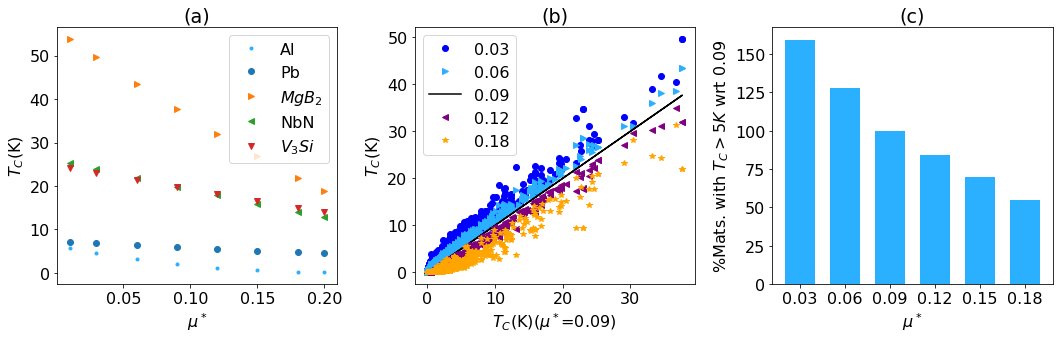

In [151]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
the_grid=GridSpec(1,3)
plt.rcParams.update({'font.size':16})
#plt.rcParams["font.family"] = "Times"
plt.figure(figsize=(15,5))

plt.subplot(the_grid[0,0])
plt.title('(a)')

mus=[0.01,0.03,0.06,0.09,0.12,0.15,0.18,.2]
jid='JVASP-1151'
vals_mgb2=np.array([df01[df01['jid']==jid].Tc.values[0],df03[df03['jid']==jid].Tc.values[0],df06[df06['jid']==jid].Tc.values[0],df09[df09['jid']==jid].Tc.values[0],df12[df12['jid']==jid].Tc.values[0],df15[df15['jid']==jid].Tc.values[0],df18[df18['jid']==jid].Tc.values[0],df2[df2['jid']==jid].Tc.values[0]])
jid='JVASP-961' #961
vals_pb=np.array([df01[df01['jid']==jid].Tc.values[0],df03[df03['jid']==jid].Tc.values[0],df06[df06['jid']==jid].Tc.values[0],df09[df09['jid']==jid].Tc.values[0],df12[df12['jid']==jid].Tc.values[0],df15[df15['jid']==jid].Tc.values[0],df18[df18['jid']==jid].Tc.values[0],df2[df2['jid']==jid].Tc.values[0]])

jid='JVASP-816' #961
vals_al=np.array([df01[df01['jid']==jid].Tc.values[0],df03[df03['jid']==jid].Tc.values[0],df06[df06['jid']==jid].Tc.values[0],df09[df09['jid']==jid].Tc.values[0],df12[df12['jid']==jid].Tc.values[0],df15[df15['jid']==jid].Tc.values[0],df18[df18['jid']==jid].Tc.values[0],df2[df2['jid']==jid].Tc.values[0]])

jid='JVASP-14960' #961
vals_v3si=np.array([df01[df01['jid']==jid].Tc.values[0],df03[df03['jid']==jid].Tc.values[0],df06[df06['jid']==jid].Tc.values[0],df09[df09['jid']==jid].Tc.values[0],df12[df12['jid']==jid].Tc.values[0],df15[df15['jid']==jid].Tc.values[0],df18[df18['jid']==jid].Tc.values[0],df2[df2['jid']==jid].Tc.values[0]])


jid='JVASP-36335'
vals_nbn=np.array([df01[df01['jid']==jid].Tc.values[0],df03[df03['jid']==jid].Tc.values[0],df06[df06['jid']==jid].Tc.values[0],df09[df09['jid']==jid].Tc.values[0],df12[df12['jid']==jid].Tc.values[0],df15[df15['jid']==jid].Tc.values[0],df18[df18['jid']==jid].Tc.values[0],df2[df2['jid']==jid].Tc.values[0]])
plt.plot(mus,vals_al,'.',label='Al',color='#2ab0ff')
plt.plot(mus,vals_pb,'o',label='Pb')
plt.plot(mus,vals_mgb2,'>',label='$MgB_2$')
plt.plot(mus,vals_nbn,'<',label='NbN')
plt.plot(mus,vals_v3si,'v',label='$V_3Si$')
plt.xlabel('$\mu^*$')
plt.ylabel('$T_C$(K)')
plt.legend()

plt.subplot(the_grid[0,1])
plt.title('(b)')
import numpy as np

# pdm = pd.merge(df09,df01,on='jid')
# pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
# pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
# plt.plot(pdm['Tc_x'],pdm['Tc_y'],'.',label='0.01')

pdm = pd.merge(df09,df03,on='jid')
pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500) & (pdm['stability_x']=='stable')&(pdm['stability_y']=='stable')]
plt.plot(pdm['Tc_x'],pdm['Tc_y'],'o',label='0.03',color='blue')


pdm = pd.merge(df09,df06,on='jid')
pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
#pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500) & (pdm['stability_x']=='stable')&(pdm['stability_y']=='stable')]
plt.plot(pdm['Tc_x'],pdm['Tc_y'],'>',label='0.06',color='#2ab0ff')

pdm = pd.merge(df09,df09,on='jid')
pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
#pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500) & (pdm['stability_x']=='stable')&(pdm['stability_y']=='stable')]
plt.plot(pdm['Tc_x'],pdm['Tc_y'],label='0.09',color='black')

pdm = pd.merge(df09,df12,on='jid')
pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
#pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500) & (pdm['stability_x']=='stable')&(pdm['stability_y']=='stable')]
plt.plot(pdm['Tc_x'],pdm['Tc_y'],'<',label='0.12',color='purple')

# pdm = pd.merge(df09,df15,on='jid')
# pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
# pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
# plt.plot(pdm['Tc_x'],pdm['Tc_y'],'.',label='0.15')

pdm = pd.merge(df09,df18,on='jid')
pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
#pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500) & (pdm['stability_x']=='stable')&(pdm['stability_y']=='stable')]
plt.plot(pdm['Tc_x'],pdm['Tc_y'],'*',label='0.18',color='orange')


# pdm = pd.merge(df09,df2,on='jid')
# pdm=pdm.replace([np.inf, -np.inf], np.nan).dropna()
# pdm=pdm[(pdm['Tc_x']<500) & (pdm['Tc_y']<500)]
# plt.plot(pdm['Tc_x'],pdm['Tc_y'],'v',label='0.2')

plt.legend()
plt.xlabel('$T_C$(K)($\mu^*$=0.09)')
plt.ylabel('$T_C$(K)')



plt.subplot(the_grid[0,2])
plt.title('(c)')

thresh=5
tc5 = [df03[(df03['Tc']>=thresh) & (df03['Tc']<300)&(df03['stability']=='stable')].shape[0], df06[(df06['Tc']>=thresh)&(df06['Tc']<300)&(df06['stability']=='stable')].shape[0], df09[(df09['Tc']>=thresh)&(df09['Tc']<300)&(df09['stability']=='stable')].shape[0], df12[(df12['Tc']>=thresh)&(df12['Tc']<300)&(df12['stability']=='stable')].shape[0], df15[(df15['Tc']>=thresh)&(df15['Tc']<300)&(df15['stability']=='stable')].shape[0], df18[(df18['Tc']>=thresh)&(df18['Tc']<300)&(df15['stability']=='stable')].shape[0]]
print ('tc5',tc5)
tc5=np.array(tc5)/tc5[2]*100
#tc5
print (tc5)
plt.bar([.03,.06,.09,.12,0.15,.18],tc5,width=.02,color='#2ab0ff')
plt.xticks([.03,.06,.09,.12,0.15,.18],[.03,.06,.09,.12,0.15,.18])
plt.xlabel('$\mu^*$')
plt.ylabel('%Mats. with ${T_C}>5K$ wrt 0.09')
#, df2[df2['Tc']>=5].shape[0],c='#169acf',facecolor='#2ab0ff'
plt.tight_layout()
# plt.savefig('mu_dependence.pdf')
# plt.close()

In [125]:
df09[(df09['Tc']>=thresh)&(df09['Tc']<300)&(df09['stability']=='stable')].shape[0]

163

In [126]:
df09[(df09['Tc']<300)&(df09['stability']=='stable')].shape[0]

736

In [127]:
df09[(df09['Tc']<300)].shape[0]

1288

In [128]:
(1288-736)/1288

0.42857142857142855

In [142]:
df09['Tc_round']=df09['Tc'].apply(lambda x: round(x,3))
df09['formula']=df09['atoms'].apply(lambda x: Atoms.from_dict(x).composition.reduced_formula)
df09[df09.duplicated('Tc_round', keep=False)&(df09['stability']=='stable')]

,stability,jid,atoms,cfid,wlog,lamb,Tc,a2F,a2F_original_x,a2F_original_y,press,Tc_round,formula
3,stable,JVASP-101090,"{'lattice_mat': [[3.062788242846556, 0.0, 0.0]...",[],372.6513,0.2346,3.986099e-02,"[5.961249999999999e-07, 1.6890826379946482e-06...","[0.8763987957866891, 2.629192305650647, 4.3820...","[5.961249999999999e-07, 1.6095400000000002e-05...",0 GPa,0.040,TiNbAlC
14,stable,JVASP-102748,"{'lattice_mat': [[1.6003106493751802, 0.923939...",[],444.4471,0.3857,2.732351e+00,"[-4.4228699999999994e-07, -1.057968047677338e-...","[0.880528125149689, 2.6415870965886823, 4.4026...","[-4.4228699999999994e-07, -9.517649999999999e-...",0 GPa,2.732,HfNbC2
23,stable,JVASP-105947,"{'lattice_mat': [[1.604253748973587, 0.9262163...",[],424.6418,0.3728,2.188085e+00,"[-3.9617e-07, -6.232644351728906e-07, -2.53310...","[0.8810927616194241, 2.64328780884692, 4.40547...","[-3.9617e-07, -3.76169e-06, 4.6403900000000005...",0 GPa,2.188,ZrTaC2
25,stable,JVASP-106310,"{'lattice_mat': [[1.5721656058318572, 0.907690...",[],507.8707,0.3086,7.967187e-01,"[-1.63956e-07, -5.384933805002324e-07, -3.0393...","[0.850235038405963, 2.55070103350847, 4.251181...","[-1.63956e-07, -4.41654e-06, -3.81826e-06, 1.1...",0 GPa,0.797,ZrTiCN
33,stable,JVASP-107338,"{'lattice_mat': [[1.5834430182550592, 0.914201...",[],547.7880,0.2621,2.083220e-01,"[-7.45514e-07, -1.813352641859127e-06, -1.2634...","[0.9013176317943851, 2.703955616522768, 4.5065...","[-7.45514e-07, -2.0251800000000005e-05, -0.000...",0 GPa,0.208,HfTiC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,stable,JVASP-94831,"{'lattice_mat': [[4.173847040657655, 0.0, 0.0]...","[3440.0, 2927.7881500000003, 0.9693, -30.05050...",654.5146,0.2027,7.376135e-03,"[3.12449e-06, 3.12449e-06, 1.5222246162955021e...","[1.541022180038031, 4.623080145812161, 7.70512...","[3.12449e-06, 8.436150000000001e-05, 0.0006193...",0 GPa,0.007,SrB6
1221,stable,JVASP-14601,"{'lattice_mat': [[0.0, 3.266572916697213, 3.26...","[4168.75, 2875.0715, 5.365, -102.4199999999999...",108.2536,0.2540,2.961828e-02,"[1.71198e-06, 0.0005839276442280001, 0.0045549...","[0.23227783795085102, 0.6968321532827471, 1.16...","[1.71198e-06, 4.62237e-05, 0.000870168, 0.0021...",0 GPa,0.030,Sn
1252,stable,JVASP-36265,"{'lattice_mat': [[0.0, 2.756128526498433, 2.75...","[2209.8, 1612.1345000000001, 3.286666666666666...",238.1658,0.2298,1.939437e-02,"[1.83272e-06, 1.6273768375007523e-05, 9.759531...","[0.6226171520426821, 1.8678582589770811, 3.113...","[1.83272e-06, 4.94835e-05, 0.000502864, 0.0014...",0 GPa,0.019,LiMnAs
1276,stable,JVASP-17812,"{'lattice_mat': [[2.676191860947843, 0.0, 0.0]...","[3938.95, 3153.8201, 4.125, -32.39024999999999...",375.8206,0.1484,3.064167e-07,"[3.37835e-07, 2.1433282912884678e-06, 8.340696...","[0.708667750030274, 2.125999168381402, 3.54334...","[3.37835e-07, 9.12156e-06, 5.3959e-05, 0.00015...",0 GPa,0.000,FeSi2


In [143]:
df09['Tc_round']=df09['Tc'].apply(lambda x: round(x,3))
df09['formula']=df09['atoms'].apply(lambda x: Atoms.from_dict(x).composition.reduced_formula)
df09[df09.duplicated('formula', keep=False)&(df09['stability']=='stable')]

,stability,jid,atoms,cfid,wlog,lamb,Tc,a2F,a2F_original_x,a2F_original_y,press,Tc_round,formula
18,stable,JVASP-103539,"{'lattice_mat': [[4.6823966447049905, 0.0, 0.0...",[],224.6779,0.6427,8.340611,"[2.5041799999999995e-06, 4.643017755581849e-06...","[0.9376108313851731, 2.8434140216982433, 4.749...","[2.5041799999999995e-06, 6.78393e-05, 0.001049...",0 GPa,8.341,W2C
20,stable,JVASP-104711,"{'lattice_mat': [[1.560808380368156, 0.9011331...",[],267.0232,0.3534,1.021207,"[0.0018124514099800001, 0.002816297032562, 0.0...","[-5.064149665712508, -3.224264721958916, -1.38...","[2.65055e-06, 0.000119742, 0.00065465400000000...",0 GPa,1.021,Nb4C3
138,stable,JVASP-20229,"{'lattice_mat': [[2.900994060110005, 0.0, 0.0]...",[],573.3813,0.1843,0.000880,"[4.0076999999999996e-07, 5.307620896668799e-07...","[0.977757164668224, 2.933266051725446, 4.88878...","[4.0076999999999996e-07, 1.18292e-05, 7.578290...",0 GPa,0.001,WC
140,stable,JVASP-20492,"{'lattice_mat': [[2.900994059367478, 0.0, 0.0]...",[],573.3837,0.1843,0.000880,"[4.0074899999999996e-07, 5.307400894598363e-07...","[0.9777558040984171, 2.933266051725446, 4.8887...","[4.0074899999999996e-07, 1.1828400000000002e-0...",0 GPa,0.001,WC
143,stable,JVASP-22351,"{'lattice_mat': [[0.0, 3.688154337495252, 3.68...",[],265.5183,0.4938,4.597895,"[9.191389999999999e-07, 9.191389999999999e-07,...","[1.403101218744003, 4.209290050533944, 7.01547...","[9.191389999999999e-07, 0.00765733, 0.0657066,...",0 GPa,4.598,ScB12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,stable,JVASP-15718,"{'lattice_mat': [[0.0, 2.087546721233118, 2.08...","[2218.9419999999996, 1605.750825, 0.89, -24.61...",408.4282,0.5783,11.543340,"[7.20141e-07, 2.420291374333797e-06, 1.3482286...","[0.8463070733743381, 2.538918498983401, 4.2315...","[7.20141e-07, 1.9443800000000005e-05, 0.000132...",0 GPa,11.543,FeN
1273,stable,JVASP-15844,"{'lattice_mat': [[0.0, 2.316451137242641, 2.31...","[3987.4, 3702.1575000000003, 3.304000000000000...",507.4280,0.4239,4.856717,"[1.08423e-08, 9.811712412930206e-08, 1.4108015...","[0.6175939283167521, 1.852783145520064, 3.0879...","[1.08423e-08, 2.9274399999999996e-07, 9.673579...",0 GPa,4.857,ScC
1274,stable,JVASP-16080,"{'lattice_mat': [[0.0, 1.730166968652271, 1.73...","[3267.6, 2334.1291, 0.0, -47.588045, 0.0, 47.5...",230.9000,1.2505,25.295913,"[1.07089e-06, 2.770158959427243e-05, 0.0008336...","[0.343300334168595, 1.029902363075592, 1.71650...","[1.07089e-06, 2.8914200000000002e-05, 0.000133...",0 GPa,25.296,Mn
1281,stable,JVASP-25344,"{'lattice_mat': [[0.0, 1.730166973096141, 1.73...","[3267.6, 2334.1291, 0.0, -47.588045, 0.0, 47.5...",230.9022,1.2504,25.294010,"[1.07084e-06, 2.769999203556263e-05, 0.0008332...","[0.34330169473840105, 1.029906444785012, 1.716...","[1.07084e-06, 2.8912700000000002e-05, 0.000133...",0 GPa,25.294,Mn


In [129]:
df03[df03[df03['Tc']<300].duplicated('Tc')]

/tmp/ipykernel_1261/2007418706.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df03[df03[df03['Tc']<300].duplicated('Tc')]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [120]:
pdm

,stability_x,jid,atoms_x,cfid_x,wlog_x,lamb_x,Tc_x,a2F_x,a2F_original_x_x,a2F_original_y_x,...,stability_y,atoms_y,cfid_y,wlog_y,lamb_y,Tc_y,a2F_y,a2F_original_x_y,a2F_original_y_y,press_y
0,unstable,JVASP-100362,"{'lattice_mat': [[2.998059165522247, 0.0, 0.0]...",[],367.1520,0.2466,0.072168,"[8.58567e-07, 3.114212969337788e-06, 2.2197773...","[0.8818016184886581, 2.6454102977452, 4.409008...","[8.58567e-07, 3.45145e-05, 0.00020180100000000...",...,unstable,"{'lattice_mat': [[2.998059165522247, 0.0, 0.0]...",[],367.1520,0.2466,4.646233e-07,"[8.58567e-07, 3.114212969337788e-06, 2.2197773...","[0.8818016184886581, 2.6454102977452, 4.409008...","[8.58567e-07, 3.45145e-05, 0.00020180100000000...",0 GPa
1,unstable,JVASP-100537,"{'lattice_mat': [[1.535294424875754, 0.8864026...",[],301.4093,0.4464,3.581370,"[3.0659200000000006e-05, 3.0659200000000006e-0...","[1.154921040893728, 3.46477264666983, 5.774612...","[3.0659200000000006e-05, 0.00191683, 0.0096490...",...,unstable,"{'lattice_mat': [[1.535294424875754, 0.8864026...",[],301.4093,0.4464,7.960718e-01,"[3.0659200000000006e-05, 3.0659200000000006e-0...","[1.154921040893728, 3.46477264666983, 5.774612...","[3.0659200000000006e-05, 0.00191683, 0.0096490...",0 GPa
2,stable,JVASP-100800,"{'lattice_mat': [[1.547743516017826, 0.8935901...",[],463.0592,0.3484,1.628073,"[-3.6240199999999997e-07, -7.205843571151212e-...","[0.9293440092403321, 2.78803883057003, 4.64672...","[-3.6240199999999997e-07, -9.784840000000001e-...",...,stable,"{'lattice_mat': [[1.547743516017826, 0.8935901...",[],463.0592,0.3484,7.663578e-02,"[-3.6240199999999997e-07, -7.205843571151212e-...","[0.9293440092403321, 2.78803883057003, 4.64672...","[-3.6240199999999997e-07, -9.784840000000001e-...",0 GPa
3,stable,JVASP-101090,"{'lattice_mat': [[3.062788242846556, 0.0, 0.0]...",[],372.6513,0.2346,0.039861,"[5.961249999999999e-07, 1.6890826379946482e-06...","[0.8763987957866891, 2.629192305650647, 4.3820...","[5.961249999999999e-07, 1.6095400000000002e-05...",...,stable,"{'lattice_mat': [[3.062788242846556, 0.0, 0.0]...",[],372.6513,0.2346,5.818093e-09,"[5.961249999999999e-07, 1.6890826379946482e-06...","[0.8763987957866891, 2.629192305650647, 4.3820...","[5.961249999999999e-07, 1.6095400000000002e-05...",0 GPa
4,stable,JVASP-101106,"{'lattice_mat': [[1.525787454492599, 0.8809137...",[],138.6180,1.4764,17.825652,"[2.51829e-06, 0.00020769065431800002, 0.002750...","[0.9193166097657641, 2.757943026448259, 4.5965...","[2.51829e-06, 0.00467802, 0.0322733, 0.0637153...",...,stable,"{'lattice_mat': [[1.525787454492599, 0.8809137...",[],138.6180,1.4764,1.544376e+01,"[2.51829e-06, 0.00020769065431800002, 0.002750...","[0.9193166097657641, 2.757943026448259, 4.5965...","[2.51829e-06, 0.00467802, 0.0322733, 0.0637153...",0 GPa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,unstable,JVASP-120350,"{'lattice_mat': [[2.8487498009088013, 0.0, 0.0...","[1591.8333333333333, 1098.0545266666668, 5.361...",80.7782,1.6670,11.474376,"[0.08239642213925101, 0.11006431792544401, 0.1...","[-14.571974742540219, -13.671277530577639, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.623...",...,unstable,"{'lattice_mat': [[2.8487498009088013, 0.0, 0.0...","[1591.8333333333333, 1098.0545266666668, 5.361...",80.7782,1.6670,1.018043e+01,"[0.08239642213925101, 0.11006431792544401, 0.1...","[-14.571974742540219, -13.671277530577639, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.623...",0 GPa
1292,unstable,JVASP-121083,"{'lattice_mat': [[1.5875496378481682, 0.0, 0.0...","[1507.535, 2160.73, 3.4005, 1.8456800000000002...",124.5158,2.6267,23.256628,"[0.21220039237065202, 0.21510958784896203, 0.2...","[-269.9520158953285, -261.5885932942198, -253....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,unstable,"{'lattice_mat': [[1.5875496378481682, 0.0, 0.0...","[1507.535, 2160.73, 3.4005, 1.8456800000000002...",124.5158,2.6267,2.179856e+01,"[0.21220039237065202, 0.21510958784896203, 0.2...","[-269.95

In [112]:
df03

,stability,jid,atoms,cfid,wlog,lamb,Tc,a2F,a2F_original_x,a2F_original_y,press
0,unstable,JVASP-100362,"{'lattice_mat': [[2.998059165522247, 0.0, 0.0]...",[],367.1520,0.2466,0.759747,"[8.58567e-07, 3.114212969337788e-06, 2.2197773...","[0.8818016184886581, 2.6454102977452, 4.409008...","[8.58567e-07, 3.45145e-05, 0.00020180100000000...",0 GPa
1,unstable,JVASP-100537,"{'lattice_mat': [[1.535294424875754, 0.8864026...",[],301.4093,0.4464,6.728844,"[3.0659200000000006e-05, 3.0659200000000006e-0...","[1.154921040893728, 3.46477264666983, 5.774612...","[3.0659200000000006e-05, 0.00191683, 0.0096490...",0 GPa
2,stable,JVASP-100800,"{'lattice_mat': [[1.547743516017826, 0.8935901...",[],463.0592,0.3484,4.675002,"[-3.6240199999999997e-07, -7.205843571151212e-...","[0.9293440092403321, 2.78803883057003, 4.64672...","[-3.6240199999999997e-07, -9.784840000000001e-...",0 GPa
3,stable,JVASP-101090,"{'lattice_mat': [[3.062788242846556, 0.0, 0.0]...",[],372.6513,0.2346,0.576562,"[5.961249999999999e-07, 1.6890826379946482e-06...","[0.8763987957866891, 2.629192305650647, 4.3820...","[5.961249999999999e-07, 1.6095400000000002e-05...",0 GPa
4,stable,JVASP-101106,"{'lattice_mat': [[1.525787454492599, 0.8809137...",[],138.6180,1.4764,19.402773,"[2.51829e-06, 0.00020769065431800002, 0.002750...","[0.9193166097657641, 2.757943026448259, 4.5965...","[2.51829e-06, 0.00467802, 0.0322733, 0.0637153...",0 GPa
...,...,...,...,...,...,...,...,...,...,...,...
1291,unstable,JVASP-120350,"{'lattice_mat': [[2.8487498009088013, 0.0, 0.0...","[1591.8333333333333, 1098.0545266666668, 5.361...",80.7782,1.6670,12.327129,"[0.08239642213925101, 0.11006431792544401, 0.1...","[-14.571974742540219, -13.671277530577639, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.623...",0 GPa
1292,unstable,JVASP-121083,"{'lattice_mat': [[1.5875496378481682, 0.0, 0.0...","[1507.535, 2160.73, 3.4005, 1.8456800000000002...",124.5158,2.6267,24.212025,"[0.21220039237065202, 0.21510958784896203, 0.2...","[-269.9520158953285, -261.5885932942198, -253....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa
1293,unstable,JVASP-75533,"{'lattice_mat': [[0.0, 3.088526447918374, 3.08...","[2368.5833333333335, 1801.8176, 4.778000000000...",34.8511,2.2685,6.343056,"[0.11810774696421801, 0.127220645736632, 0.135...","[-19.590028303205454, -18.745250510293726, -17...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa
1294,unstable,JVASP-15176,"{'lattice_mat': [[4.140196742992578, 0.0, 0.0]...","[3828.0, 3551.140866666667, 3.467, -20.3097462...",313.3907,0.2942,1.584155,"[5.27543e-07, 1.207598454758185e-06, 8.7457170...","[0.9097844577007941, 2.729357454811803, 4.5489...","[5.27543e-07, 1.4243700000000002e-05, 6.594290...",0 GPa


In [116]:
df03[df09['Tc']<300]

,stability,jid,atoms,cfid,wlog,lamb,Tc,a2F,a2F_original_x,a2F_original_y,press
0,unstable,JVASP-100362,"{'lattice_mat': [[2.998059165522247, 0.0, 0.0]...",[],367.1520,0.2466,0.759747,"[8.58567e-07, 3.114212969337788e-06, 2.2197773...","[0.8818016184886581, 2.6454102977452, 4.409008...","[8.58567e-07, 3.45145e-05, 0.00020180100000000...",0 GPa
1,unstable,JVASP-100537,"{'lattice_mat': [[1.535294424875754, 0.8864026...",[],301.4093,0.4464,6.728844,"[3.0659200000000006e-05, 3.0659200000000006e-0...","[1.154921040893728, 3.46477264666983, 5.774612...","[3.0659200000000006e-05, 0.00191683, 0.0096490...",0 GPa
2,stable,JVASP-100800,"{'lattice_mat': [[1.547743516017826, 0.8935901...",[],463.0592,0.3484,4.675002,"[-3.6240199999999997e-07, -7.205843571151212e-...","[0.9293440092403321, 2.78803883057003, 4.64672...","[-3.6240199999999997e-07, -9.784840000000001e-...",0 GPa
3,stable,JVASP-101090,"{'lattice_mat': [[3.062788242846556, 0.0, 0.0]...",[],372.6513,0.2346,0.576562,"[5.961249999999999e-07, 1.6890826379946482e-06...","[0.8763987957866891, 2.629192305650647, 4.3820...","[5.961249999999999e-07, 1.6095400000000002e-05...",0 GPa
4,stable,JVASP-101106,"{'lattice_mat': [[1.525787454492599, 0.8809137...",[],138.6180,1.4764,19.402773,"[2.51829e-06, 0.00020769065431800002, 0.002750...","[0.9193166097657641, 2.757943026448259, 4.5965...","[2.51829e-06, 0.00467802, 0.0322733, 0.0637153...",0 GPa
...,...,...,...,...,...,...,...,...,...,...,...
1291,unstable,JVASP-120350,"{'lattice_mat': [[2.8487498009088013, 0.0, 0.0...","[1591.8333333333333, 1098.0545266666668, 5.361...",80.7782,1.6670,12.327129,"[0.08239642213925101, 0.11006431792544401, 0.1...","[-14.571974742540219, -13.671277530577639, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.623...",0 GPa
1292,unstable,JVASP-121083,"{'lattice_mat': [[1.5875496378481682, 0.0, 0.0...","[1507.535, 2160.73, 3.4005, 1.8456800000000002...",124.5158,2.6267,24.212025,"[0.21220039237065202, 0.21510958784896203, 0.2...","[-269.9520158953285, -261.5885932942198, -253....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa
1293,unstable,JVASP-75533,"{'lattice_mat': [[0.0, 3.088526447918374, 3.08...","[2368.5833333333335, 1801.8176, 4.778000000000...",34.8511,2.2685,6.343056,"[0.11810774696421801, 0.127220645736632, 0.135...","[-19.590028303205454, -18.745250510293726, -17...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa
1294,unstable,JVASP-15176,"{'lattice_mat': [[4.140196742992578, 0.0, 0.0]...","[3828.0, 3551.140866666667, 3.467, -20.3097462...",313.3907,0.2942,1.584155,"[5.27543e-07, 1.207598454758185e-06, 8.7457170...","[0.9097844577007941, 2.729357454811803, 4.5489...","[5.27543e-07, 1.4243700000000002e-05, 6.594290...",0 GPa


In [117]:
df18[df18['Tc']<300]

,stability,jid,atoms,cfid,wlog,lamb,Tc,a2F,a2F_original_x,a2F_original_y,press
0,unstable,JVASP-100362,"{'lattice_mat': [[2.998059165522247, 0.0, 0.0]...",[],367.1520,0.2466,4.646233e-07,"[8.58567e-07, 3.114212969337788e-06, 2.2197773...","[0.8818016184886581, 2.6454102977452, 4.409008...","[8.58567e-07, 3.45145e-05, 0.00020180100000000...",0 GPa
1,unstable,JVASP-100537,"{'lattice_mat': [[1.535294424875754, 0.8864026...",[],301.4093,0.4464,7.960718e-01,"[3.0659200000000006e-05, 3.0659200000000006e-0...","[1.154921040893728, 3.46477264666983, 5.774612...","[3.0659200000000006e-05, 0.00191683, 0.0096490...",0 GPa
2,stable,JVASP-100800,"{'lattice_mat': [[1.547743516017826, 0.8935901...",[],463.0592,0.3484,7.663578e-02,"[-3.6240199999999997e-07, -7.205843571151212e-...","[0.9293440092403321, 2.78803883057003, 4.64672...","[-3.6240199999999997e-07, -9.784840000000001e-...",0 GPa
3,stable,JVASP-101090,"{'lattice_mat': [[3.062788242846556, 0.0, 0.0]...",[],372.6513,0.2346,5.818093e-09,"[5.961249999999999e-07, 1.6890826379946482e-06...","[0.8763987957866891, 2.629192305650647, 4.3820...","[5.961249999999999e-07, 1.6095400000000002e-05...",0 GPa
4,stable,JVASP-101106,"{'lattice_mat': [[1.525787454492599, 0.8809137...",[],138.6180,1.4764,1.544376e+01,"[2.51829e-06, 0.00020769065431800002, 0.002750...","[0.9193166097657641, 2.757943026448259, 4.5965...","[2.51829e-06, 0.00467802, 0.0322733, 0.0637153...",0 GPa
...,...,...,...,...,...,...,...,...,...,...,...
1291,unstable,JVASP-120350,"{'lattice_mat': [[2.8487498009088013, 0.0, 0.0...","[1591.8333333333333, 1098.0545266666668, 5.361...",80.7782,1.6670,1.018043e+01,"[0.08239642213925101, 0.11006431792544401, 0.1...","[-14.571974742540219, -13.671277530577639, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.623...",0 GPa
1292,unstable,JVASP-121083,"{'lattice_mat': [[1.5875496378481682, 0.0, 0.0...","[1507.535, 2160.73, 3.4005, 1.8456800000000002...",124.5158,2.6267,2.179856e+01,"[0.21220039237065202, 0.21510958784896203, 0.2...","[-269.9520158953285, -261.5885932942198, -253....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa
1293,unstable,JVASP-75533,"{'lattice_mat': [[0.0, 3.088526447918374, 3.08...","[2368.5833333333335, 1801.8176, 4.778000000000...",34.8511,2.2685,5.591194e+00,"[0.11810774696421801, 0.127220645736632, 0.135...","[-19.590028303205454, -18.745250510293726, -17...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 GPa
1294,unstable,JVASP-15176,"{'lattice_mat': [[4.140196742992578, 0.0, 0.0]...","[3828.0, 3551.140866666667, 3.467, -20.3097462...",313.3907,0.2942,1.402060e-03,"[5.27543e-07, 1.207598454758185e-06, 8.7457170...","[0.9097844577007941, 2.729357454811803, 4.5489...","[5.27543e-07, 1.4243700000000002e-05, 6.594290...",0 GPa


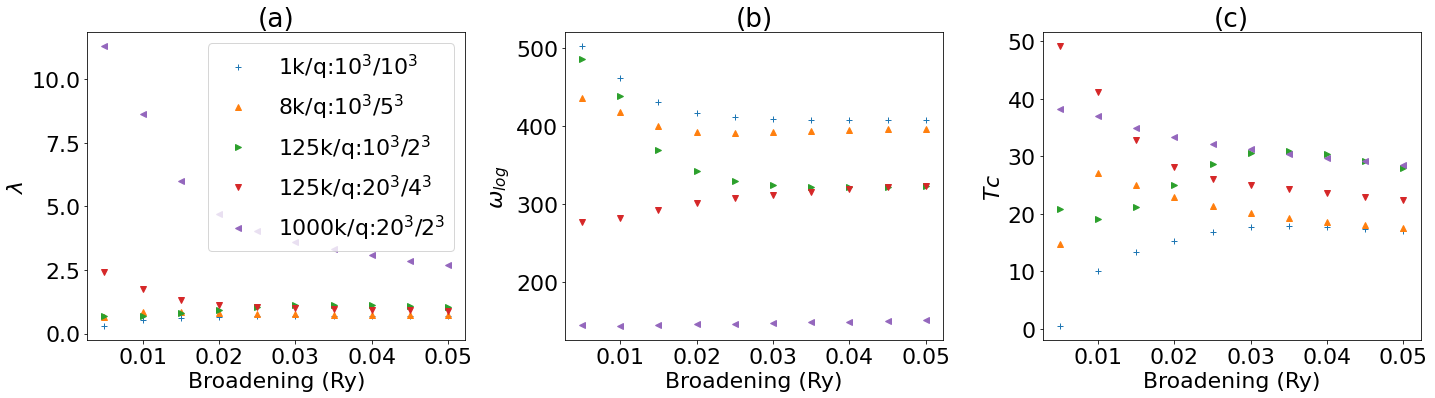

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as plticker
the_grid=GridSpec(1,3)
plt.rcParams.update({'font.size':22})
plt.figure(figsize=(20,6))


def real_broadenig(fname='Braodening_JVASP-19657_101010_222'):
    f=open(fname,'r')
    lines=f.read().splitlines()
    f.close()
    wlog=[]
    sm=[]
    lam=[]
    tc=[]
    for i in lines:
        tmp=[float(j) for j in i.split()]
        sm.append(tmp[0])
        wlog.append(tmp[1])
        lam.append(tmp[2])
        tc.append(tmp[3])
    return sm,lam,wlog,tc

plt.subplot(the_grid[0])
plt.title('(a)')
val=real_broadenig('Braodening_JVASP-19657_101010_101010')
plt.plot(val[0],val[1],'+',label='1k/q:10$^3$/10$^3$')  
   
val=real_broadenig('Braodening_JVASP-19657_101010_555')
plt.plot(val[0],val[1],'^',label='8k/q:10$^3$/5$^3$')    
    
val=real_broadenig('Braodening_JVASP-19657_101010_222')
plt.plot(val[0],val[1],'>',label='125k/q:10$^3$/2$^3$')

val=real_broadenig('Braodening_JVASP-19657_202020_444')
plt.plot(val[0],val[1],'v',label='125k/q:20$^3$/4$^3$')

val=real_broadenig('Braodening_JVASP-19657_202020_222')
plt.plot(val[0],val[1],'<',label='1000k/q:20$^3$/2$^3$')


plt.xlabel('Broadening (Ry)')
plt.ylabel('$\lambda$')
plt.legend()
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
#           ncol=5, fancybox=True, shadow=True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)


plt.subplot(the_grid[1])
plt.title('(b)')
val=real_broadenig('Braodening_JVASP-19657_101010_101010')
plt.plot(val[0],val[2],'+',label='1 k-pts per q-pts')  
   
val=real_broadenig('Braodening_JVASP-19657_101010_555')
plt.plot(val[0],val[2],'^',label='8 k-pts per q-pts')    
    
val=real_broadenig('Braodening_JVASP-19657_101010_222')
plt.plot(val[0],val[2],'>',label='125 k-points per q-points')

val=real_broadenig('Braodening_JVASP-19657_202020_444')
plt.plot(val[0],val[2],'v',label='125 k-pts per q-pts')

val=real_broadenig('Braodening_JVASP-19657_202020_222')
plt.plot(val[0],val[2],'<',label='1000 k-pts per q-pts')


plt.xlabel('Broadening (Ry)')
plt.ylabel('$\omega_{log}$')
#plt.legend()


plt.subplot(the_grid[2])
plt.title('(c)')
val=real_broadenig('Braodening_JVASP-19657_101010_101010')
plt.plot(val[0],val[3],'+',label='1 k-points per q-points')  
   
val=real_broadenig('Braodening_JVASP-19657_101010_555')
plt.plot(val[0],val[3],'^',label='8 k-points per q-points')    
    
val=real_broadenig('Braodening_JVASP-19657_101010_222')
plt.plot(val[0],val[3],'>',label='125 k-points per q-points')

val=real_broadenig('Braodening_JVASP-19657_202020_444')
plt.plot(val[0],val[3],'v',label='125 k-points per q-points')

val=real_broadenig('Braodening_JVASP-19657_202020_222')
plt.plot(val[0],val[3],'<',label='1000 k-points per q-points')


plt.xlabel('Broadening (Ry)')
plt.ylabel('$Tc}$')
plt.tight_layout()
# plt.savefig('converg.pdf')
# plt.close()

In [362]:
# dft_3d=data('dft_3d')

2.9801405399323473
kc 408.69093061369375
Debye Temp 408.7014738903392 Kelvin
elastic_tensor [[93.4, 58.2, 58.2, 0.0, 0.0, 0.0], [58.2, 93.4, 58.2, 0.0, 0.0, 0.0], [58.2, 58.2, 93.4, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.2, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 16.2, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 16.2]]
ET debye 329.33287128160873


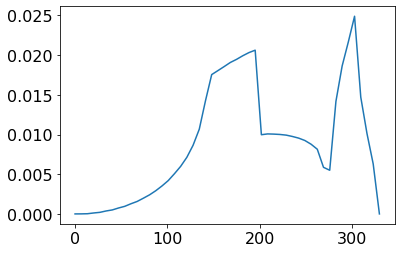

In [369]:
# #Kevin, Kamal codes comapre
# import scipy
# from jarvis.core.atoms import Atoms
# from jarvis.db.figshare import data
# from jarvis.analysis.elastic.tensor import ElasticTensor
# from jarvis.analysis.structure.spacegroup import Spacegroup3D
# import numpy as np
# from jarvis.db.figshare import data
# # icm_to_eV = 1.23981e-4
# # hbar = 6.582119569e-16  # eV*s
# # kB = 8.617333262145e-5  # eV/K
# # e = 1.60217662e-19
# # Na = 6.0221409e23

# # # dft_3d = data('dft_3d')
# # # def get_jid_debye_temp_et(jid=''):
# # #     for i in dft_3d:
# # #         if i['jid']==jid:
# # #             atoms
# # class PhononDos(object):
# #     """Module to analyze phonon dos."""
# #     def __init__(self, phonon_dos=[], phonon_freq_cm=[]):
# #         """Initialize class."""
# #         self.phonon_dos = phonon_dos
# #         self.phonon_freq_cm = phonon_freq_cm

# #     def debye_temperature(self,atoms=None):
# #         """Get Debye temperature."""
# #         # http://dx.doi.org/10.1103/PhysRevB.89.024304
# #         # Eq. 10
# #         n = atoms.num_atoms
# #         omega = np.array(self.phonon_freq_cm) * icm_to_eV
# #         gomega = np.array(self.phonon_dos)
# #         integ = np.trapz(omega ** 2 * gomega, omega) / np.trapz(gomega, omega)
# #         prefact = 1 / kB
# #         moment_debye = (
# #              n ** (-1 / 3) * (prefact) * np.sqrt(5 / 3 * integ)
# #         )
# #         return moment_debye

# #     def heat_capacity(self,temperature=300):
# #         """Get heat capacity at a temperature."""
# #         omega = np.array(self.phonon_freq_cm) * icm_to_eV
# #         #http://www.columbia.edu/~jh2228/phonons_thermal_hone.pdf
# #         # Eq. 1
# #         dos = np.array(self.phonon_dos) / icm_to_eV
# #         x= (omega) / (kB * temperature)
# #         Cp = kB * x[1:]**2 * (np.exp(x[1:]) / (np.exp(x[1:]) - 1)**2) * dos[1:]
# #         Cp = np.insert(Cp, 0,0)
# #         return np.trapz(Cp, omega) * e * Na

# #     def vibrational_entropy(self,temperature=300):
# #         """Get heat vibrational entropy at a temperature."""
# #         omega = np.array(self.phonon_freq_cm) * icm_to_eV
# #         dos = np.array(self.phonon_dos) / icm_to_eV
# #         x= (omega) / (kB * temperature)
# #         n = 1 / (np.exp(x[1:]) - 1)
# #         S_vib = kB  * ((n + 1) * np.log(n + 1) + n * np.log(n))
# #         S_vib = np.insert(S_vib, 0, S_vib[0])
# #         return S_vib
# # dft_3d=data('dft_3d')
# def get_et_debye(jid):
#     for i in dft_3d:
#       if i['jid']==jid:
#         print("elastic_tensor",i['elastic_tensor'])
#         atoms=Spacegroup3D(Atoms.from_dict(i['atoms'])).conventional_standard_structure
#         deb=ElasticTensor(i['elastic_tensor']).debye_temperature(atoms)
#         return deb
# jid='JVASP-19821' #MgB2
# jid='JVASP-816' #Al
# jid='JVASP-1002' #Si
# jid='JVASP-19679' #ZrN
# jid='JVASP-19821' #MgB2
# jid='JVASP-816' #Al
# plt.plot(df085[df085['jid']==jid].dos_info.values[0]['phonon_dos_x'],df085[df085['jid']==jid].dos_info.values[0]['phonon_dos_y'])
# print (np.trapz(df085[df085['jid']==jid].dos_info.values[0]['phonon_dos_y'],df085[df085['jid']==jid].dos_info.values[0]['phonon_dos_x']))
# atoms=Atoms.from_dict(df085[df085['jid']==jid].atoms.values[0])
# ph=PhononDos(phonon_dos=df085[df085['jid']==jid].dos_info.values[0]['phonon_dos_y'], phonon_freq_cm=df085[df085['jid']==jid].dos_info.values[0]['phonon_dos_x'])
# print('kc',ph.debye_temperature(atoms))
# kb = 8.617333262145e-5   #scipy.constants.k
# ev = 13.605869253
# ha = ev * 2.0
# amu_ry = 1.660538782E-27 / 9.10938215E-31 / 2.0 #kg and electron mass                                                                                       
# kg = 1.660538782E-27
# hartree_si = 4.35974394E-18
# hplank = 6.62606896E-34

# au_sec = hplank / hartree_si / (2.0 * np.pi)
# au_ps = au_sec * 1e12
# au_thz = au_ps
# ryd_to_thz = 1 / au_thz / (4.0 * np.pi)
# ryd_to_hz  = 1 / au_thz / (4.0 * np.pi)  * 10.0**(12)
# c_si = 2.99792458E+8
# ryd_to_cm = 1e10 * ryd_to_thz / c_si

# meters = 0.529177 * 10**-10
# def debyeT(phx,phy,nat):
#         DOS=[]
#         for i,j in zip(phx,phy):
#             DOS.append([i,j])
# #        DOS = self.dos(N, smear, nstep)                                                                                                                                 
#         int0 = 0.0
#         int2 = 0.0
#         de = DOS[1][0] - DOS[0][0]
#         #print ('Delta E ' + str(de))
#         for [e,d] in DOS:
#             if e > 0.0:
#                 int0 += d * de
#                 int2 += e**2 * d * de


#             #convert to radians!!!!!!!!!!!                                                                                                                               
#         conversion_factor_cm_sec = 1.0 / ryd_to_cm**2 * ryd_to_thz**2 * 10**24 * (2.0 * np.pi)**2

#         prefactor = float(nat)**(-1./3.) * (5*hbar**2 / (3 * kb**2))**0.5
# #         print 'nat ' + str(self.nat)
# #         print 'prefactor ' + str(prefactor)
# #         print 'hbar ' + str(self.hbar)
# #         print 'kb ' + str(self.kb)
# #         print 'conversion cm to sec sq ' + str(conversion_factor_cm_sec)
# #         print 'second moment ' + str(int2) + ' cm2 ' + str(conversion_factor_cm_sec * int2) + ' sec2'
# #         print '0th moment ' + str(int0)
#         theta = prefactor * (int2*conversion_factor_cm_sec/int0)**0.5
#         print ('Debye Temp ' + str(theta) + ' Kelvin')
#         return theta
# DOS=[]
# for x,y in zip(df085[df085['jid']==jid].dos_info.values[0]['phonon_dos_x'],df085[df085['jid']==jid].dos_info.values[0]['phonon_dos_y']):
#     DOS.append([x,y])
# x=debyeT(df085[df085['jid']==jid].dos_info.values[0]['phonon_dos_x'],df085[df085['jid']==jid].dos_info.values[0]['phonon_dos_y'],atoms.num_atoms)
# print ('ET debye',get_et_debye(jid))

ph_deb JVASP-100362 312.2857131791905
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-100537 609.4530713467952
et_deb 542.0513408165313
ph_deb_jv_phn None
ph_deb JVASP-100800 554.7280182826928
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-101090 391.99310845595664
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-101106 546.1929903046789
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-101642 172.66542756757684
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-101689 515.6467807680942
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-101716 480.3817833764241
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-102190 545.859305328946
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-102340 508.21426227947444
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-102633 352.31374451737685
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-102642 462.6244239063404
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-102648 440.18240964785593
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-102675 539.8382578530602
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-1027

/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis_tools-2022.5.20-py3.8.egg/jarvis/analysis/elastic/tensor.py:67: RuntimeWarning: invalid value encountered in sqrt
  vel = np.sqrt(1e9 * g_vrh / mass_density)


ph_deb JVASP-114005 765.9279584996598
et_deb nan
ph_deb_jv_phn None
ph_deb JVASP-114008 621.2970661713108
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-114009 449.5425512277564
et_deb 241.7509846844153
ph_deb_jv_phn None
ph_deb JVASP-114146 219.56907366371772
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-114499 469.87869304084325
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-114503 714.109331999476
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-114513 551.4423289148516
et_deb nan
ph_deb_jv_phn None
ph_deb JVASP-114521 355.60731734478196
et_deb 199.52269493294915
ph_deb_jv_phn None
ph_deb JVASP-114888 792.3445558039716
et_deb 400.627074713989
ph_deb_jv_phn None
ph_deb JVASP-114895 533.466390886829
et_deb nan
ph_deb_jv_phn None
ph_deb JVASP-115277 518.1310209071324
et_deb nan
ph_deb_jv_phn None
ph_deb JVASP-115486 900.079518385422
et_deb nan
ph_deb_jv_phn None
ph_deb JVASP-115489 441.28258234272056
et_deb 140.16463752055049
ph_deb_jv_phn None
ph_deb JVASP-115498 578.3310742540305
et_deb 247.40176

/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis_tools-2022.5.20-py3.8.egg/jarvis/analysis/elastic/tensor.py:57: RuntimeWarning: invalid value encountered in sqrt
  vel = np.sqrt(1e9 * (k_vrh + 4.0 / 3.0 * g_vrh) / mass_density)


ph_deb JVASP-115505 568.5898191301663
et_deb nan
ph_deb_jv_phn None
ph_deb JVASP-115515 429.4893068133401
et_deb nan
ph_deb_jv_phn None
ph_deb JVASP-115517 638.5266554355019
et_deb nan
ph_deb_jv_phn None
ph_deb JVASP-116494 413.01964082141774
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-116736 595.4369216873276
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-117458 171.78665652683486
et_deb 100.15532382207965
ph_deb_jv_phn None
ph_deb JVASP-117460 637.6707112534161
et_deb nan
ph_deb_jv_phn None
ph_deb JVASP-117461 792.3201086460131
et_deb 92.35288991346356
ph_deb_jv_phn None
ph_deb JVASP-117466 272.1707794646787
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-117542 443.78461014358635
et_deb 119.86043071280564
ph_deb_jv_phn None
ph_deb JVASP-119430 248.42271927035696
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-119915 798.8337561222465
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-119939 249.63048747104324
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-120819 556.7417428324402
et_deb nan
ph_deb_jv_ph

ph_deb JVASP-62584 274.4355081183866
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-62610 380.9917137154043
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-62649 591.9971935249775
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-62928 273.6114634089539
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-62948 409.35050993895356
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-63225 582.5546208484293
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-63234 560.1044952927024
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-63308 274.3744324254904
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-63343 559.3004985186939
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-63705 293.9299370977386
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-79492 413.8094484829142
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-79602 561.2063882801019
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-80472 503.34486255628195
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-80726 484.8701978868986
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-85150 197.76013233389122
et_deb N

ph_deb JVASP-16452 144.87730153658265
et_deb 11091.589139399875
ph_deb_jv_phn None
ph_deb JVASP-16463 480.3694686221335
et_deb 811.3533891158582
ph_deb_jv_phn 721.3055015099674
ph_deb JVASP-16647 259.60874199908903
et_deb 627.0434185998143
ph_deb_jv_phn 405.6382639693525
ph_deb JVASP-16660 273.37857539373624
et_deb 609.8346825045493
ph_deb_jv_phn 324.0870670736279
ph_deb JVASP-16762 217.56854297511128
et_deb 723.8558447166066
ph_deb_jv_phn 349.12188187787257
ph_deb JVASP-16781 211.98069861427444
et_deb 524.6087497705081
ph_deb_jv_phn 266.215374516669
ph_deb JVASP-16869 305.90427673557343
et_deb 774.5537092219059
ph_deb_jv_phn 447.6718735741095
ph_deb JVASP-16897 521.2533366458232
et_deb 664.2014863266495
ph_deb_jv_phn 790.8459242319683
ph_deb JVASP-16903 292.944192410404
et_deb 540.7771173352514
ph_deb_jv_phn 395.19317417991704
ph_deb JVASP-16924 394.63104094357465
et_deb 623.5052474506648
ph_deb_jv_phn 577.7676112196388
ph_deb JVASP-17310 385.1306659567747
et_deb 593.9740518204985
ph_

ph_deb JVASP-91708 229.30458595445495
et_deb 504.82516702876137
ph_deb_jv_phn None
ph_deb JVASP-92687 612.6935582228823
et_deb 903.8666775496253
ph_deb_jv_phn None
ph_deb JVASP-93232 327.03482333439246
et_deb 495.15326395100755
ph_deb_jv_phn None
ph_deb JVASP-93356 197.33178891095682
et_deb 439.43205098936227
ph_deb_jv_phn None
ph_deb JVASP-93360 264.25884543163653
et_deb 588.1671761568039
ph_deb_jv_phn None
ph_deb JVASP-93368 385.91527296870333
et_deb 633.6961560564708
ph_deb_jv_phn None
ph_deb JVASP-93823 958.5219633972049
et_deb 734.1292795169238
ph_deb_jv_phn None
ph_deb JVASP-93895 211.40258190975024
et_deb 535.4194552223281
ph_deb_jv_phn None
ph_deb JVASP-94854 282.78654861111045
et_deb 545.1820491704348
ph_deb_jv_phn None
ph_deb JVASP-94898 290.15614248960713
et_deb 544.0249380723727
ph_deb_jv_phn None
ph_deb JVASP-99406 231.0984525897102
et_deb 489.2775736473739
ph_deb_jv_phn None
ph_deb JVASP-99516 560.3438074948104
et_deb 1021.1846432141574
ph_deb_jv_phn None
ph_deb JVASP-995

ph_deb JVASP-116379 536.9895346526511
et_deb 308.43838515045684
ph_deb_jv_phn None
ph_deb JVASP-118338 478.06022621415536
et_deb 730.5686144175626
ph_deb_jv_phn None
ph_deb JVASP-118527 482.6552845038136
et_deb 321.2206938491965
ph_deb_jv_phn None
ph_deb JVASP-118592 609.1148135981679
et_deb 374.33828364484754
ph_deb_jv_phn None
ph_deb JVASP-118904 855.5836065950383
et_deb 311.29610651236993
ph_deb_jv_phn None
ph_deb JVASP-120177 459.7920742080592
et_deb 331.59876382021616
ph_deb_jv_phn None
ph_deb JVASP-120277 543.6234622602664
et_deb 615.6267267178072
ph_deb_jv_phn None
ph_deb JVASP-122952 330.82992084839645
et_deb 396.8071929852214
ph_deb_jv_phn None
ph_deb JVASP-14488 262.6567154607788
et_deb 353.3780531794908
ph_deb_jv_phn 235.59008595899468
ph_deb JVASP-14496 505.7713619558466
et_deb 400.76997648303376
ph_deb_jv_phn 737.1580171543363
ph_deb JVASP-14525 392.1217149858941
et_deb 513.7344254375586
ph_deb_jv_phn 357.0957927370871
ph_deb JVASP-14667 540.7608481071446
et_deb 379.089480

ph_deb JVASP-19674 465.17809795975984
et_deb 305.3349299100848
ph_deb_jv_phn 707.5087802261676
ph_deb JVASP-19842 181.40339483609847
et_deb 304.72486220294167
ph_deb_jv_phn 258.4158118924118
ph_deb JVASP-20506 187.22805279089263
et_deb 369.52853539231364
ph_deb_jv_phn 310.4823149667497
ph_deb JVASP-20627 296.98443282878253
et_deb 410.1107899537978
ph_deb_jv_phn 343.89870268359476
ph_deb JVASP-35970 229.37995113577293
et_deb 323.6240383512909
ph_deb_jv_phn 334.3245645764874
ph_deb JVASP-359 180.09833890471916
et_deb 316.25022780872496
ph_deb_jv_phn 253.0843556588049
ph_deb JVASP-36314 655.8880680475447
et_deb 361.8324948027217
ph_deb_jv_phn 616.7654182240983
ph_deb JVASP-37092 317.35848355525656
et_deb 480.15336951717285
ph_deb_jv_phn 430.8832148637286
ph_deb JVASP-37414 195.6579800200889
et_deb 333.7270336904475
ph_deb_jv_phn 182.11362411259725
ph_deb JVASP-37463 200.7076768540075
et_deb 332.6871280193449
ph_deb_jv_phn 192.62761535569751
ph_deb JVASP-38820 231.65288222593676
et_deb 362

ph_deb JVASP-18768 348.82202337905727
et_deb 473.9994327558786
ph_deb_jv_phn 327.476617659751
ph_deb JVASP-19676 186.6437441159421
et_deb 440.572622476018
ph_deb_jv_phn 234.01637951003428
ph_deb JVASP-19 186.94305658031914
et_deb 305.4874227142931
ph_deb_jv_phn 261.28174254634393
ph_deb JVASP-20613 212.20803502946757
et_deb 317.93310799587925
ph_deb_jv_phn 318.22876983817173
ph_deb JVASP-36014 249.09564705033242
et_deb 374.7780192415438
ph_deb_jv_phn 260.52535522283364
ph_deb JVASP-37107 222.47502653539516
et_deb 349.79320561840314
ph_deb_jv_phn 220.8315133592735
ph_deb JVASP-37415 177.20303727370586
et_deb 312.12583644380385
ph_deb_jv_phn 173.5542176153705
ph_deb JVASP-37753 205.52077678222662
et_deb 317.5168562224643
ph_deb_jv_phn 184.49478883945991
ph_deb JVASP-38856 231.39838711629042
et_deb 369.8625561465961
ph_deb_jv_phn 227.40401771374022
ph_deb JVASP-38883 210.37228746040864
et_deb 414.3405171774177
ph_deb_jv_phn 225.01748324113663
ph_deb JVASP-38893 224.14249672239453
et_deb 3

ph_deb JVASP-16372 257.0970677230358
et_deb 440.4684971849401
ph_deb_jv_phn 237.67168967059672
ph_deb JVASP-16526 192.87769017217906
et_deb 375.2851602339523
ph_deb_jv_phn 238.64540611411365
ph_deb JVASP-16586 181.73163534441235
et_deb 350.1528950913589
ph_deb_jv_phn 240.31125893966586
ph_deb JVASP-17275 283.0211054962505
et_deb 520.9631391476463
ph_deb_jv_phn 338.96628949125494
ph_deb JVASP-17282 512.6590177198818
et_deb 633.7111214784237
ph_deb_jv_phn 590.8868650896037
ph_deb JVASP-17902 280.3883860372334
et_deb 496.1061785668109
ph_deb_jv_phn 415.4027216328461
ph_deb JVASP-17925 234.65217678168477
et_deb 444.4421644569868
ph_deb_jv_phn 330.6514674772968
ph_deb JVASP-18033 168.82779119035953
et_deb 339.7806428169823
ph_deb_jv_phn 287.759875289
ph_deb JVASP-18706 202.22700728607634
et_deb 356.860017857234
ph_deb_jv_phn 203.00176481073996
ph_deb JVASP-18919 198.0753429394815
et_deb 399.10724848613285
ph_deb_jv_phn 292.61465903745244
ph_deb JVASP-18923 299.31060102123223
et_deb 506.9754

ph_deb JVASP-37103 267.59553522936807
et_deb 409.70915520028495
ph_deb_jv_phn 260.3439943854163
ph_deb JVASP-37614 189.5575069568477
et_deb 331.5798234656321
ph_deb_jv_phn 281.75630463014926
ph_deb JVASP-38647 195.14304062805525
et_deb 352.1399582072453
ph_deb_jv_phn 278.0676594378629
ph_deb JVASP-39455 194.27266270896038
et_deb 409.19779456922424
ph_deb_jv_phn 294.21379030846333
ph_deb JVASP-41912 261.27900231865743
et_deb 404.85745914759946
ph_deb_jv_phn 273.5532687864045
ph_deb JVASP-64995 375.4353988826378
et_deb 329.8106938370134
ph_deb_jv_phn 342.42565005541593
ph_deb JVASP-65132 463.4185769723946
et_deb 550.0696211617371
ph_deb_jv_phn 669.5791577646677
ph_deb JVASP-67270 334.7310537754885
et_deb 543.2850085868689
ph_deb_jv_phn 480.8213813603425
ph_deb JVASP-67604 291.0791174235862
et_deb 382.07405228190316
ph_deb_jv_phn 465.9552459930631
ph_deb JVASP-67632 330.4421711415012
et_deb 362.5994272554713
ph_deb_jv_phn 331.0854593157399
ph_deb JVASP-67748 340.1612722162168
et_deb 344.2

ph_deb JVASP-136988 331.3341797709807
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-137002 248.87010854982802
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-137147 201.18862539147227
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-137178 463.4688519329129
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-137195 158.21995085908063
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-137804 361.89339452665604
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-137814 577.8441223137428
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-137824 391.6868921386322
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-137975 449.5713499005196
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-137989 432.6381740075033
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-137996 292.030036494243
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-138087 331.03111624312834
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-138090 234.37804610505904
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-138333 187.1150094158609
et_deb None
ph_deb_jv_phn None
ph_deb JVASP-138807 452.58651

ph_deb JVASP-102813 594.4333027268437
et_deb 1109.5428231840694
ph_deb_jv_phn None
ph_deb JVASP-103120 487.3775361424338
et_deb 612.4364728567635
ph_deb_jv_phn None
ph_deb JVASP-103383 522.8085006354204
et_deb 773.7051259551577
ph_deb_jv_phn None
ph_deb JVASP-103410 558.4020250633818
et_deb 836.7837685345283
ph_deb_jv_phn None
ph_deb JVASP-104923 250.38979535301607
et_deb 549.694011917664
ph_deb_jv_phn None
ph_deb JVASP-10934 494.7300402949522
et_deb 706.5386388897725
ph_deb_jv_phn 735.7510483476922
ph_deb JVASP-109736 578.7915108785545
et_deb 851.7657966184333
ph_deb_jv_phn None
ph_deb JVASP-110540 388.2796396732528
et_deb 624.186818383772
ph_deb_jv_phn None
ph_deb JVASP-113653 661.3186904634157
et_deb 556.2032307002703
ph_deb_jv_phn None
ph_deb JVASP-114014 875.7303428609167
et_deb 1137.4822384811841
ph_deb_jv_phn None
ph_deb JVASP-114338 534.1537013216188
et_deb 1131.0553906061557
ph_deb_jv_phn None
ph_deb JVASP-114341 508.097976235452
et_deb 657.7885266478376
ph_deb_jv_phn None
ph_

ph_deb JVASP-36554 341.839034383415
et_deb 763.6697730487743
ph_deb_jv_phn 341.67216376583383
ph_deb JVASP-36602 388.4158503412068
et_deb 534.6370121953323
ph_deb_jv_phn 527.4231237601966
ph_deb JVASP-36615 520.9845318262118
et_deb 738.6912516188856
ph_deb_jv_phn 817.7026353369534
ph_deb JVASP-36626 412.16885045169494
et_deb 537.2122853424738
ph_deb_jv_phn 584.2138777191742
ph_deb JVASP-36632 467.11119533003455
et_deb 577.6727517898031
ph_deb_jv_phn 808.1993656923809
ph_deb JVASP-36636 377.9769485908024
et_deb 657.2330759483
ph_deb_jv_phn 539.1290184913418
ph_deb JVASP-36745 362.4926159578618
et_deb 566.966913675731
ph_deb_jv_phn 389.5761602549157
ph_deb JVASP-36813 319.74919747409547
et_deb 562.8585967264709
ph_deb_jv_phn 381.4506552737125
ph_deb JVASP-37011 669.6887023356156
et_deb 635.1460010298679
ph_deb_jv_phn 620.8426048834687
ph_deb JVASP-37027 274.4160192384501
et_deb 526.5625052645265
ph_deb_jv_phn 260.21997046537575
ph_deb JVASP-37744 442.5960418257088
et_deb 516.833464446627

ph_deb JVASP-14810 245.0965235590651
et_deb 367.24859025199265
ph_deb_jv_phn 273.6796205093533
ph_deb JVASP-15844 522.1101835260083
et_deb 650.8640946680968
ph_deb_jv_phn 505.69156048610654
ph_deb JVASP-16080 322.12882341208893
et_deb 565.7302921469254
ph_deb_jv_phn 311.41688883212527
ph_deb JVASP-16587 185.990155531087
et_deb 532.075286426296
ph_deb_jv_phn 191.71464736316457
ph_deb JVASP-17812 420.01203268948905
et_deb 701.8908107880383
ph_deb_jv_phn 537.4078889054233
ph_deb JVASP-18397 1181.5005223392
et_deb 783.2080094622361
ph_deb_jv_phn 289.7060099449832
ph_deb JVASP-19657 697.4494338858239
et_deb 947.4189032134614
ph_deb_jv_phn 643.6702586168943
ph_deb JVASP-19694 242.03165164087744
et_deb 386.9016903411682
ph_deb_jv_phn 98.36499435412465
ph_deb JVASP-19896 567.4144993530155
et_deb 819.3106878788354
ph_deb_jv_phn 541.128910688296
ph_deb JVASP-25344 322.1312688481889
et_deb 565.7302921469254
ph_deb_jv_phn 311.418163431927
ph_deb JVASP-36214 558.1267196159157
et_deb 479.46743797282

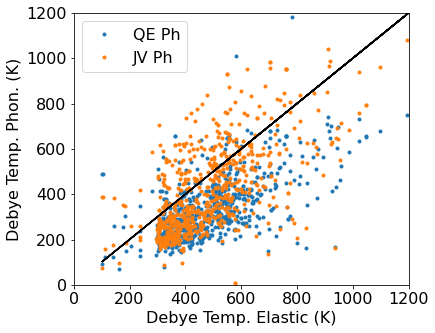

In [367]:
# import scipy
# from jarvis.core.atoms import Atoms
# from jarvis.db.figshare import data
# from jarvis.analysis.elastic.tensor import ElasticTensor
# from jarvis.analysis.structure.spacegroup import Spacegroup3D
# import numpy as np
# from jarvis.db.figshare import data
# from jarvis.analysis.phonon.dos import PhononDos

# def get_et_debye(jid):
#     for i in dft_3d:
#       if i['jid']==jid:
#         #print("elastic_tensor",i['elastic_tensor'])
#         atoms=Spacegroup3D(Atoms.from_dict(i['atoms'])).conventional_standard_structure
#         deb=ElasticTensor(i['elastic_tensor']).debye_temperature(atoms)
#         return deb
# # dft_3d=data('dft_3d')
# # icm_to_eV = 1.23981e-4
# # hbar = 6.582119569e-16  # eV*s
# # kB = 8.617333262145e-5  # eV/K
# # e = 1.60217662e-19
# # Na = 6.0221409e23

# # dft_3d = data('dft_3d')
# # phon=data('edos_pdos')
# # class PhononDos(object):
# #     """Module to analyze phonon dos."""
# #     def __init__(self, phonon_dos=[], phonon_freq_cm=[]):
# #         """Initialize class."""
# #         self.phonon_dos = phonon_dos
# #         self.phonon_freq_cm = phonon_freq_cm

# #     def debye_temperature(self,atoms=None):
# #         """Get Debye temperature."""
# #         # http://dx.doi.org/10.1103/PhysRevB.89.024304
# #         # Eq. 10
# #         n = atoms.num_atoms
# #         omega = np.array(self.phonon_freq_cm) * icm_to_eV
# #         gomega = np.array(self.phonon_dos)
# #         integ = np.trapz(omega ** 2 * gomega, omega) / np.trapz(gomega, omega)
# #         prefact = 1 / kB
# #         moment_debye = (
# #              n ** (-1 / 3) * (prefact) * np.sqrt(5 / 3 * integ)
# #         )
# #         return moment_debye

# #     def heat_capacity(self,temperature=300):
# #         """Get heat capacity at a temperature."""
# #         omega = np.array(self.phonon_freq_cm) * icm_to_eV
# #         #http://www.columbia.edu/~jh2228/phonons_thermal_hone.pdf
# #         # Eq. 1
# #         dos = np.array(self.phonon_dos) / icm_to_eV
# #         x= (omega) / (kB * temperature)
# #         Cp = kB * x[1:]**2 * (np.exp(x[1:]) / (np.exp(x[1:]) - 1)**2) * dos[1:]
# #         Cp = np.insert(Cp, 0,0)
# #         return np.trapz(Cp, omega) * e * Na

# #     def vibrational_entropy(self,temperature=300):
# #         """Get heat vibrational entropy at a temperature."""
# #         omega = np.array(self.phonon_freq_cm) * icm_to_eV
# #         dos = np.array(self.phonon_dos) / icm_to_eV
# #         x= (omega) / (kB * temperature)
# #         n = 1 / (np.exp(x[1:]) - 1)
# #         S_vib = kB  * ((n + 1) * np.log(n + 1) + n * np.log(n))
# #         S_vib = np.insert(S_vib, 0, S_vib[0])
# #         return S_vib
    
# # def get_et_debye(jid):
# #     for i in dft_3d:
# #       if i['jid']==jid and i['elastic_tensor']!='na':
# #         #print("elastic_tensor",i['elastic_tensor'])
# #         atoms=Spacegroup3D(Atoms.from_dict(i['atoms'])).conventional_standard_structure
# #         deb=ElasticTensor(i['elastic_tensor']).debye_temperature(atoms)
# #         return deb
# # def get_et_phon_jv(jid):
# #     for i in phon:
# #       if i['jid']==jid and i['pdos_elast']!='na':
# #         #print("elastic_tensor",i['elastic_tensor'])
# #         phy=i['pdos_elast']
# #         phx=np.arange(0, 1000, 5)
# #         atoms=Spacegroup3D(Atoms.from_dict(i['atoms'])).conventional_standard_structure
# #         deb=PhononDos(phonon_dos=phy,phonon_freq_cm=phx).debye_temperature(atoms)*np.pi/2 #*3/atoms.num_atoms
# #         return deb
    
# all_et=[]
# all_ph=[]
# all_ph_jv=[]
# for ii,i in df085.iterrows():
#     jid=i['jid']
#     try:
        
# #      if jid=='JVASP-816':
#         atoms=Atoms.from_dict(i['atoms'])
#         phx = i['dos_info']['phonon_dos_x']
#         phy = i['dos_info']['phonon_dos_y']
#         ph_deb = PhononDos(phonon_dos=phy,phonon_freq_cm=phx).debye_temperature(atoms)
#         et_deb=get_et_debye(jid)
#         ph_deb_jv_phn=get_et_phon_jv(jid)
#         print('ph_deb',jid,ph_deb)
#         print('et_deb',et_deb)
#         print('ph_deb_jv_phn',ph_deb_jv_phn)
#         #kd=debyeT(phx,phy,atoms.num_atoms)
#         #print('kd',kd)
#         if et_deb is not None and et_deb!=np.inf and ph_deb!=np.inf and not np.isnan(et_deb) and ph_deb_jv_phn is not None:
#             all_ph.append(ph_deb)
#             all_et.append(et_deb)
#             all_ph_jv.append(ph_deb_jv_phn)
#             #break
#     except:
#         print('passed',jid)
#         pass
# plt.rcParams.update({'font.size':16})
# #plt.rcParams["font.family"] = "Times"
# plt.figure(figsize=(6,5))
# plt.plot(all_et,all_ph,'.',label='QE Ph')
# plt.plot(all_et,all_ph_jv,'.',label='JV Ph')
# plt.plot(all_et,all_et,c='black')
# plt.legend()
# plt.xlim([0,1200])
# plt.ylim([0,1200])
# plt.xlabel('Debye Temp. Elastic (K)')
# plt.ylabel('Debye Temp. Phon. (K)')
# from sklearn.metrics import mean_absolute_error,r2_score
# print (mean_absolute_error(all_et,all_ph),r2_score(all_et,all_ph))
# print (mean_absolute_error(all_et,all_ph_jv),r2_score(all_et,all_ph_jv))

In [360]:
len(all_ph_jv)

680

/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis/analysis/elastic/tensor.py:67: RuntimeWarning: invalid value encountered in sqrt
  vel = np.sqrt(1e9 * g_vrh / mass_density)
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis/analysis/elastic/tensor.py:57: RuntimeWarning: invalid value encountered in sqrt
  vel = np.sqrt(1e9 * (k_vrh + 4.0 / 3.0 * g_vrh) / mass_density)


passed JVASP-18544
passed JVASP-111352
passed JVASP-19974
passed JVASP-20435
passed JVASP-20512
passed JVASP-20636
passed JVASP-35775
passed JVASP-14490
passed JVASP-20073
passed JVASP-14741
passed JVASP-103109
passed JVASP-78273
216.73939590919682 -0.12313366970272277


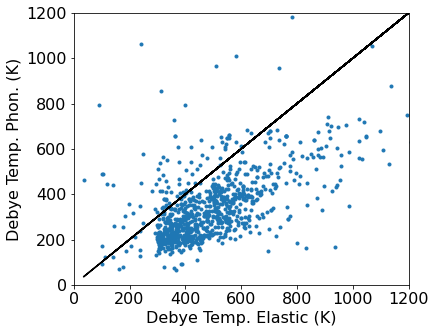

In [103]:
import scipy
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data
from jarvis.analysis.elastic.tensor import ElasticTensor
from jarvis.analysis.structure.spacegroup import Spacegroup3D
import numpy as np
from jarvis.db.figshare import data
from jarvis.analysis.phonon.dos import PhononDos
# dft_3d=data('dft_3d')
# icm_to_eV = 1.23981e-4
# hbar = 6.582119569e-16  # eV*s
# kB = 8.617333262145e-5  # eV/K
# e = 1.60217662e-19
# Na = 6.0221409e23

# # dft_3d = data('dft_3d')
# # phon=data('edos_pdos')
# class PhononDos(object):
#     """Module to analyze phonon dos."""
#     def __init__(self, phonon_dos=[], phonon_freq_cm=[]):
#         """Initialize class."""
#         self.phonon_dos = phonon_dos
#         self.phonon_freq_cm = phonon_freq_cm

#     def debye_temperature(self,atoms=None):
#         """Get Debye temperature."""
#         # http://dx.doi.org/10.1103/PhysRevB.89.024304
#         # Eq. 10
#         n = atoms.num_atoms
#         omega = np.array(self.phonon_freq_cm) * icm_to_eV
#         gomega = np.array(self.phonon_dos)
#         integ = np.trapz(omega ** 2 * gomega, omega) / np.trapz(gomega, omega)
#         prefact = 1 / kB
#         moment_debye = (
#              n ** (-1 / 3) * (prefact) * np.sqrt(5 / 3 * integ)
#         )
#         return moment_debye

#     def heat_capacity(self,temperature=300):
#         """Get heat capacity at a temperature."""
#         omega = np.array(self.phonon_freq_cm) * icm_to_eV
#         #http://www.columbia.edu/~jh2228/phonons_thermal_hone.pdf
#         # Eq. 1
#         dos = np.array(self.phonon_dos) / icm_to_eV
#         x= (omega) / (kB * temperature)
#         Cp = kB * x[1:]**2 * (np.exp(x[1:]) / (np.exp(x[1:]) - 1)**2) * dos[1:]
#         Cp = np.insert(Cp, 0,0)
#         return np.trapz(Cp, omega) * e * Na

#     def vibrational_entropy(self,temperature=300):
#         """Get heat vibrational entropy at a temperature."""
#         omega = np.array(self.phonon_freq_cm) * icm_to_eV
#         dos = np.array(self.phonon_dos) / icm_to_eV
#         x= (omega) / (kB * temperature)
#         n = 1 / (np.exp(x[1:]) - 1)
#         S_vib = kB  * ((n + 1) * np.log(n + 1) + n * np.log(n))
#         S_vib = np.insert(S_vib, 0, S_vib[0])
#         return S_vib
    
def get_et_debye(jid):
    for i in dft_3d:
      if i['jid']==jid and i['elastic_tensor']!='na':
        #print("elastic_tensor",i['elastic_tensor'])
        atoms=Spacegroup3D(Atoms.from_dict(i['atoms'])).conventional_standard_structure
        deb=ElasticTensor(i['elastic_tensor']).debye_temperature(atoms)
        return deb
def get_et_phon_jv(jid):
    for i in phon:
      if i['jid']==jid and i['pdos_elast']!='na':
        #print("elastic_tensor",i['elastic_tensor'])
        phy=i['pdos_elast']
        phx=np.arange(0, 1000, 5)
        atoms=Spacegroup3D(Atoms.from_dict(i['atoms'])).conventional_standard_structure
        deb=PhononDos(phonon_dos=phy,phonon_freq_cm=phx).debye_temperature(atoms)*np.pi/2 #*3/atoms.num_atoms
        return deb
    
all_et=[]
all_ph=[]
all_ph_jv=[]
for ii,i in df085.iterrows():
    jid=i['jid']
    try:
        
#      if jid=='JVASP-816':
        atoms=Atoms.from_dict(i['atoms'])
        phx = i['dos_info']['phonon_dos_x']
        phy = i['dos_info']['phonon_dos_y']
        ph_deb = PhononDos(phonon_dos=phy,phonon_freq_cm=phx).debye_temperature(atoms)
        et_deb=get_et_debye(jid)
#         ph_deb_jv_phn=get_et_phon_jv(jid)
#         print('ph_deb',jid,ph_deb)
#         print('et_deb',et_deb)
#         print('ph_deb_jv_phn',ph_deb_jv_phn)
        #kd=debyeT(phx,phy,atoms.num_atoms)
        #print('kd',kd)
        if et_deb is not None and et_deb!=np.inf and ph_deb!=np.inf and not np.isnan(et_deb):# and ph_deb_jv_phn is not None:
            all_ph.append(ph_deb)
            all_et.append(et_deb)
            #all_ph_jv.append(ph_deb_jv_phn)
            #break
    except:
        print('passed',jid)
        pass
plt.rcParams.update({'font.size':16})
#plt.rcParams["font.family"] = "Times"
plt.figure(figsize=(6,5))
plt.plot(all_et,all_ph,'.')
# plt.plot(all_et,all_ph_jv,'.')
plt.plot(all_et,all_et,c='black')
plt.xlim([0,1200])
plt.ylim([0,1200])
plt.xlabel('Debye Temp. Elastic (K)')
plt.ylabel('Debye Temp. Phon. (K)')
from sklearn.metrics import mean_absolute_error,r2_score
print (mean_absolute_error(all_et,all_ph),r2_score(all_et,all_ph))
#print (mean_absolute_error(all_et,all_ph_jv),r2_score(all_et,all_ph_jv))